In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                             

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 9ms/step - loss: 0.5038 - rmse: 0.4947
Epoch 2/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4984 - rmse: 0.4902
Epoch 3/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4938 - rmse: 0.4865
Epoch 4/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4893 - rmse: 0.4828
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4850 - rmse: 0.4794
Epoch 6/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4811 - rmse: 0.4763
Epoch 7/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4776 - rmse: 0.4736
Epoch 8/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4744 - rmse: 0.4712
Epoch 9/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4708 - rmse: 0.4684
Epoch 10/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4685 - rmse: 0.4669
Epoch 11/10000
2/2 [============================

2/2 [==============================] - 0s 9ms/step - loss: 0.3742 - rmse: 0.4329
Epoch 87/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3732 - rmse: 0.4326
Epoch 88/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3723 - rmse: 0.4324
Epoch 89/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3704 - rmse: 0.4309
Epoch 90/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3709 - rmse: 0.4324
Epoch 91/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3688 - rmse: 0.4308
Epoch 92/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3672 - rmse: 0.4297
Epoch 93/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3663 - rmse: 0.4295
Epoch 94/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3655 - rmse: 0.4294
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3647 - rmse: 0.4294
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 0.2669 - rmse: 0.3635
Epoch 171/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2655 - rmse: 0.3621
Epoch 172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2619 - rmse: 0.3579
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2604 - rmse: 0.3564
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2593 - rmse: 0.3557
Epoch 175/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2584 - rmse: 0.3550
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2556 - rmse: 0.3518
Epoch 177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2532 - rmse: 0.3491
Epoch 178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2517 - rmse: 0.3478
Epoch 179/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2503 - rmse: 0.3463
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.1409 - rmse: 0.2051
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1387 - rmse: 0.2007
Epoch 256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1376 - rmse: 0.1988
Epoch 257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1367 - rmse: 0.1973
Epoch 258/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1359 - rmse: 0.1963
Epoch 259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1342 - rmse: 0.1927
Epoch 260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1338 - rmse: 0.1927
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1321 - rmse: 0.1890
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1317 - rmse: 0.1889
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1296 - rmse: 0.1842
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0814 - rmse: 0.0869
Epoch 339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0825 - rmse: 0.0941
Epoch 340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0810 - rmse: 0.0875
Epoch 341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0796 - rmse: 0.0803
Epoch 342/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0805 - rmse: 0.0872
Epoch 343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0796 - rmse: 0.0832
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0790 - rmse: 0.0810
Epoch 345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0786 - rmse: 0.0803
Epoch 346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0782 - rmse: 0.0794
Epoch 347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0777 - rmse: 0.0778
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 19ms/step - loss: 0.0574 - rmse: 0.0405
Epoch 423/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0577 - rmse: 0.0465
Epoch 424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0587 - rmse: 0.0580
Epoch 425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0570 - rmse: 0.0421
Epoch 426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0567 - rmse: 0.0415
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0564 - rmse: 0.0398
Epoch 428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0558 - rmse: 0.0340
Epoch 429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0560 - rmse: 0.0395
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0561 - rmse: 0.0427
Epoch 431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0552 - rmse: 0.0332
Epoch 432/10000
2/2 [=======================

2/2 [==============================] - 0s 8ms/step - loss: 0.0429 - rmse: 0.0171
Epoch 507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0437 - rmse: 0.0340
Epoch 508/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0431 - rmse: 0.0277
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0429 - rmse: 0.0254
Epoch 510/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0426 - rmse: 0.0231
Epoch 511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0423 - rmse: 0.0191
Epoch 512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0437 - rmse: 0.0425
Epoch 513/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0420 - rmse: 0.0178
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0420 - rmse: 0.0204
Epoch 515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0424 - rmse: 0.0308
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0338 - rmse: 0.0265
Epoch 591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0333 - rmse: 0.0167
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0338 - rmse: 0.0295
Epoch 593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0337 - rmse: 0.0308
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0335 - rmse: 0.0285
Epoch 595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0331 - rmse: 0.0226
Epoch 596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0330 - rmse: 0.0222
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0333 - rmse: 0.0296
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0326 - rmse: 0.0162
Epoch 599/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0334 - rmse: 0.0336
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0266 - rmse: 0.0234
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0263 - rmse: 0.0185
Epoch 676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0262 - rmse: 0.0165
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0282 - rmse: 0.0487
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0269 - rmse: 0.0330
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0263 - rmse: 0.0234
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0258 - rmse: 0.0129
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0261 - rmse: 0.0226
Epoch 682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0263 - rmse: 0.0283
Epoch 683/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0256 - rmse: 0.0135
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0215 - rmse: 0.0215
Epoch 759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0232 - rmse: 0.0470
Epoch 760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0210 - rmse: 0.0104
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0211 - rmse: 0.0166
Epoch 762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0218 - rmse: 0.0320
Epoch 763/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0209 - rmse: 0.0113
Epoch 764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0210 - rmse: 0.0184
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0208 - rmse: 0.0129
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0208 - rmse: 0.0153
Epoch 767/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0214 - rmse: 0.0297
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0177 - rmse: 0.0183
Epoch 843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0187 - rmse: 0.0374
Epoch 844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0177 - rmse: 0.0205
Epoch 845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0182 - rmse: 0.0309
Epoch 846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0173 - rmse: 0.0103
Epoch 847/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0172 - rmse: 0.0069
Epoch 848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0172 - rmse: 0.0093
Epoch 849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0173 - rmse: 0.0146
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0173 - rmse: 0.0171
Epoch 851/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0189 - rmse: 0.0432
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.0321
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0157 - rmse: 0.0337
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.0320
Epoch 929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0152 - rmse: 0.0268
Epoch 930/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0155 - rmse: 0.0310
Epoch 931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0153 - rmse: 0.0286
Epoch 932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0152 - rmse: 0.0273
Epoch 933/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0166 - rmse: 0.0464
Epoch 934/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0148 - rmse: 0.0212
Epoch 935/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0152 - rmse: 0.0284
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0147 - rmse: 0.0461
Epoch 1011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0129 - rmse: 0.0191
Epoch 1012/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0129 - rmse: 0.0212
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0128 - rmse: 0.0188
Epoch 1014/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0128 - rmse: 0.0190
Epoch 1015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0135 - rmse: 0.0322
Epoch 1016/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0126 - rmse: 0.0131
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0129 - rmse: 0.0233
Epoch 1018/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0132 - rmse: 0.0298
Epoch 1019/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0126 - rmse: 0.0162
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.0099
Epoch 1094/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0138
Epoch 1095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0125
Epoch 1096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0119 - rmse: 0.0315
Epoch 1097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0117 - rmse: 0.0286
Epoch 1098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0124 - rmse: 0.0399
Epoch 1099/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0109 - rmse: 0.0085
Epoch 1100/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0110 - rmse: 0.0143
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0130 - rmse: 0.0466
Epoch 1102/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0191
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0327
Epoch 1177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0248
Epoch 1178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0107 - rmse: 0.0334
Epoch 1179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0200
Epoch 1180/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0247
Epoch 1181/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0163
Epoch 1182/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0163
Epoch 1183/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0103 - rmse: 0.0275
Epoch 1184/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.0350
Epoch 1185/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0145
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0287
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0307
Epoch 1261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0095
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0091
Epoch 1263/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0214
Epoch 1264/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0214
Epoch 1265/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0285
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0162
Epoch 1267/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0288
Epoch 1268/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0098 - rmse: 0.0365
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0139
Epoch 1343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0094
Epoch 1344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0238
Epoch 1345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0107
Epoch 1346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0235
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0094
Epoch 1348/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0293
Epoch 1349/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0103
Epoch 1350/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0269
Epoch 1351/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0126
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0314
Epoch 1426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0113
Epoch 1427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0099
Epoch 1428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0102
Epoch 1429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0290
Epoch 1430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0403
Epoch 1431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0142
Epoch 1432/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0240
Epoch 1433/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0218
Epoch 1434/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0289
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0229
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0246
Epoch 1510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0273
Epoch 1511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0306
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0192
Epoch 1513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0318
Epoch 1514/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0207
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0148
Epoch 1516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0145
Epoch 1517/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0333
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0158
Epoch 1592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0306
Epoch 1593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0258
Epoch 1594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0324
Epoch 1595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0180
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0462
Epoch 1597/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0253
Epoch 1598/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0138
Epoch 1599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0281
Epoch 1600/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0290
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0273
Epoch 1675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0217
Epoch 1676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0143
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0404
Epoch 1678/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0334
Epoch 1679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0140
Epoch 1680/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0176
Epoch 1681/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0276
Epoch 1682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0166
Epoch 1683/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0105
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0264
Epoch 1758/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0075
Epoch 1759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0276
Epoch 1760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0199
Epoch 1761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0091
Epoch 1762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0099
Epoch 1763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0324
Epoch 1764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0402
Epoch 1765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0153
Epoch 1766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0287
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0324
Epoch 1841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0292
Epoch 1842/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0479
Epoch 1843/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0266
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0321
Epoch 1845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0316
Epoch 1846/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0189
Epoch 1847/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0135
Epoch 1848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0084
Epoch 1849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0178
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0134
Epoch 1924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0190
Epoch 1925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0141
Epoch 1926/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0175
Epoch 1927/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0477
Epoch 1928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0282
Epoch 1929/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0295
Epoch 1930/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0329
Epoch 1931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0328
Epoch 1932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0342
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0067
Epoch 2007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0116
Epoch 2008/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0197
Epoch 2009/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0140
Epoch 2010/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0100
Epoch 2011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0270
Epoch 2012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0134
Epoch 2013/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0117
Epoch 2014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0324
Epoch 2015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0275
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0256
Epoch 2090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0201
Epoch 2091/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0115
Epoch 2092/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0289
Epoch 2093/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0398
Epoch 2094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0328
Epoch 2095/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0262
Epoch 2096/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0276
Epoch 2097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0101
Epoch 2098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0218
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0433
Epoch 2173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0335
Epoch 2174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0291
Epoch 2175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0295
Epoch 2176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0205
Epoch 2177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0296
Epoch 2178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0166
Epoch 2179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0322
Epoch 2180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0146
Epoch 2181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0405
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0162
Epoch 2256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0433
Epoch 2257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0199
Epoch 2258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0254
Epoch 2259/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0361
Epoch 2260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0173
Epoch 2261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0227
Epoch 2262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0466
Epoch 2263/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0488
Epoch 2264/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0314
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0117
Epoch 2339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0230
Epoch 2340/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0175
Epoch 2341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0309
Epoch 2342/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0262
Epoch 2343/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0316
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0211
Epoch 2345/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0176
Epoch 2346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0166
Epoch 2347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0110
Epoch 2348/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0307
Epoch 2422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0090
Epoch 2423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0289
Epoch 2424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0427
Epoch 2425/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0258
Epoch 2426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0183
Epoch 2427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0285
Epoch 2428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0203
Epoch 2429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0256
Epoch 2430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0059
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0147
Epoch 2505/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0337
Epoch 2506/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0124
Epoch 2507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0158
Epoch 2508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0110
Epoch 2509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0223
Epoch 2510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0323
Epoch 2511/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0332
Epoch 2512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0467
Epoch 2513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0246
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0160
Epoch 2588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0097
Epoch 2589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0312
Epoch 2590/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0149
Epoch 2591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0307
Epoch 2592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0101
Epoch 2593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0175
Epoch 2594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0309
Epoch 2595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0232
Epoch 2596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0272
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0142
Epoch 2671/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0181
Epoch 2672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0416
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0221
Epoch 2674/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0155
Epoch 2675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0156
Epoch 2676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0145
Epoch 2677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0317
Epoch 2678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0284
Epoch 2679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0127
Epoch 2680/10000
2/2 [==============

2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0374
Epoch 2754/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0161
Epoch 2755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0141
Epoch 2756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0321
Epoch 2757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0214
Epoch 2758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0431
Epoch 2759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0237
Epoch 2760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0330
Epoch 2761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0457
Epoch 2762/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0295
Epoch 2763/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0323
Epoch 2837/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0212
Epoch 2838/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0105
Epoch 2839/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0310
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0225
Epoch 2841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0103
Epoch 2842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0331
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0112
Epoch 2844/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0322
Epoch 2845/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0173
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0209
Epoch 2920/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0482
Epoch 2921/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0481
Epoch 2922/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0307
Epoch 2923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0143
Epoch 2924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0340
Epoch 2925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0135
Epoch 2926/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0459
Epoch 2927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0168
Epoch 2928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0269
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0214
Epoch 3003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0389
Epoch 3004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0215
Epoch 3005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0168
Epoch 3006/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0369
Epoch 3007/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0233
Epoch 3008/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0472
Epoch 3009/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0269
Epoch 3010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0384
Epoch 3011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0312
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0162
Epoch 3086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0283
Epoch 3087/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0239
Epoch 3088/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0157
Epoch 3089/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0389
Epoch 3090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0254
Epoch 3091/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0197
Epoch 3092/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0243
Epoch 3093/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0180
Epoch 3094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0302
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0363
Epoch 3169/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0142
Epoch 3170/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0292
Epoch 3171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0424
Epoch 3172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0198
Epoch 3173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0451
Epoch 3174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0340
Epoch 3175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0239
Epoch 3176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0214
Epoch 3177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0311
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0348
Epoch 3252/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6346e-04 - rmse: 0.0144
Epoch 3253/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0204
Epoch 3254/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0337
Epoch 3255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0275
Epoch 3256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0296
Epoch 3257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0229
Epoch 3258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0297
Epoch 3259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0285
Epoch 3260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0213
Epoch 3261/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 9.4248e-04 - rmse: 0.0159
Epoch 3334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0306
Epoch 3335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0250
Epoch 3336/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0577e-04 - rmse: 0.0148
Epoch 3337/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0405
Epoch 3338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0266
Epoch 3339/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8367e-04 - rmse: 0.0141
Epoch 3340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0306
Epoch 3341/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1528e-04 - rmse: 0.0115
Epoch 3342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0258
Epoch 3343/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 8.2486e-04 - rmse: 0.0141
Epoch 3416/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6606e-04 - rmse: 0.0063
Epoch 3417/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7693e-04 - rmse: 0.0188
Epoch 3418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0195
Epoch 3419/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6442e-04 - rmse: 0.0155
Epoch 3420/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0321
Epoch 3421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0302
Epoch 3422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0205
Epoch 3423/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0718e-04 - rmse: 0.0093
Epoch 3424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0296
Epoch 3425/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0381
Epoch 3498/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1261e-04 - rmse: 0.0156
Epoch 3499/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4818e-04 - rmse: 0.0134
Epoch 3500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0226
Epoch 3501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0233
Epoch 3502/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0216
Epoch 3503/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2084e-04 - rmse: 0.0124
Epoch 3504/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0280
Epoch 3505/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0213e-04 - rmse: 0.0117
Epoch 3506/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4038e-04 - rmse: 0.0133
Epoch 3507/10000


2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0367
Epoch 3580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0272
Epoch 3581/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0825e-04 - rmse: 0.0171
Epoch 3582/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2891e-04 - rmse: 0.0106
Epoch 3583/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9548e-04 - rmse: 0.0089
Epoch 3584/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0259
Epoch 3585/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0429
Epoch 3586/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0331
Epoch 3587/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0255
Epoch 3588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0271
Epoch 3589/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 9.6318e-04 - rmse: 0.0221
Epoch 3662/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7127e-04 - rmse: 0.0099
Epoch 3663/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8190e-04 - rmse: 0.0202
Epoch 3664/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0752e-04 - rmse: 0.0153
Epoch 3665/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8273e-04 - rmse: 0.0177
Epoch 3666/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9942e-04 - rmse: 0.0053
Epoch 3667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0462
Epoch 3668/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0306
Epoch 3669/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1901e-04 - rmse: 0.0158
Epoch 3670/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0241
Epoch 367

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0320
Epoch 3743/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3586e-04 - rmse: 0.0201
Epoch 3744/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6135e-04 - rmse: 0.0114
Epoch 3745/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6404e-04 - rmse: 0.0115
Epoch 3746/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9040e-04 - rmse: 0.0161
Epoch 3747/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7896e-04 - rmse: 0.0187
Epoch 3748/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.0239e-04 - rmse: 0.0085
Epoch 3749/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.8929e-04 - rmse: 0.0189
Epoch 3750/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0266
Epoch 3751/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8961e-04 - rmse: 0.0078
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 9.8686e-04 - rmse: 0.0243
Epoch 3824/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9462e-04 - rmse: 0.0200
Epoch 3825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0279
Epoch 3826/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1738e-04 - rmse: 0.0048
Epoch 3827/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5791e-04 - rmse: 0.0216
Epoch 3828/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7385e-04 - rmse: 0.0090
Epoch 3829/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2157e-04 - rmse: 0.0181
Epoch 3830/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1435e-04 - rmse: 0.0229
Epoch 3831/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0290
Epoch 3832/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0261
Epoch 383

2/2 [==============================] - 0s 7ms/step - loss: 6.8290e-04 - rmse: 0.0180
Epoch 3905/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7161e-04 - rmse: 0.0106
Epoch 3906/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4664e-04 - rmse: 0.0242
Epoch 3907/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3904e-04 - rmse: 0.0195
Epoch 3908/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2547e-04 - rmse: 0.0129
Epoch 3909/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6205e-04 - rmse: 0.0174
Epoch 3910/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3090e-04 - rmse: 0.0086
Epoch 3911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0428
Epoch 3912/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3529e-04 - rmse: 0.0195
Epoch 3913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0467
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 3.5480e-04 - rmse: 0.0050
Epoch 3986/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8023e-04 - rmse: 0.0187
Epoch 3987/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2385e-04 - rmse: 0.0140
Epoch 3988/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6429e-04 - rmse: 0.0183
Epoch 3989/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3299e-04 - rmse: 0.0102
Epoch 3990/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0320
Epoch 3991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0455
Epoch 3992/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8426e-04 - rmse: 0.0126
Epoch 3993/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1554e-04 - rmse: 0.0137
Epoch 3994/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 399

2/2 [==============================] - 0s 6ms/step - loss: 8.8421e-04 - rmse: 0.0242
Epoch 4067/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4858e-04 - rmse: 0.0255
Epoch 4068/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4794e-04 - rmse: 0.0212
Epoch 4069/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 4070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 4071/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0965e-04 - rmse: 0.0226
Epoch 4072/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1816e-04 - rmse: 0.0110
Epoch 4073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 4074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 4075/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 4076/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0422
Epoch 4148/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 4149/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 4150/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2768e-04 - rmse: 0.0187
Epoch 4151/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0277
Epoch 4152/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0258e-04 - rmse: 0.0111
Epoch 4153/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3333e-04 - rmse: 0.0074
Epoch 4154/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7720e-04 - rmse: 0.0100
Epoch 4155/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 4156/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1416e-04 - rmse: 0.0184
Epoch 4157/10000


2/2 [==============================] - 0s 7ms/step - loss: 3.3370e-04 - rmse: 0.0089
Epoch 4229/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 4230/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3863e-04 - rmse: 0.0092
Epoch 4231/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3005e-04 - rmse: 0.0260
Epoch 4232/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4900e-04 - rmse: 0.0223
Epoch 4233/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0449e-04 - rmse: 0.0213
Epoch 4234/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2156e-04 - rmse: 0.0130
Epoch 4235/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 4236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 4237/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 4238/10

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 4310/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 4311/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1326e-04 - rmse: 0.0168
Epoch 4312/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9292e-04 - rmse: 0.0237
Epoch 4313/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6941e-04 - rmse: 0.0232
Epoch 4314/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9502e-04 - rmse: 0.0238
Epoch 4315/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 4316/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3979e-04 - rmse: 0.0266
Epoch 4317/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3919e-04 - rmse: 0.0105
Epoch 4318/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0856e-04 - rmse: 0.0134
Epoch 431

2/2 [==============================] - 0s 8ms/step - loss: 6.6542e-04 - rmse: 0.0213
Epoch 4391/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8959e-04 - rmse: 0.0241
Epoch 4392/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3790e-04 - rmse: 0.0181
Epoch 4393/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0283
Epoch 4394/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5847e-04 - rmse: 0.0070
Epoch 4395/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0175e-04 - rmse: 0.0096
Epoch 4396/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1553e-04 - rmse: 0.0202
Epoch 4397/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8088e-04 - rmse: 0.0217
Epoch 4398/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 4399/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6794e-04 - rmse: 0.0276
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 2.4185e-04 - rmse: 0.0070
Epoch 4472/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5830e-04 - rmse: 0.0258
Epoch 4473/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5297e-04 - rmse: 0.0257
Epoch 4474/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 4475/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0175e-04 - rmse: 0.0266
Epoch 4476/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4062e-04 - rmse: 0.0255
Epoch 4477/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2668e-04 - rmse: 0.0183
Epoch 4478/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7086e-04 - rmse: 0.0134
Epoch 4479/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2806e-04 - rmse: 0.0252
Epoch 4480/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4535e-04 - rmse: 0.0074
E

2/2 [==============================] - 0s 7ms/step - loss: 4.0404e-04 - rmse: 0.0151
Epoch 4553/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0332
Epoch 4554/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0452
Epoch 4555/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0346
Epoch 4556/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4239e-04 - rmse: 0.0192
Epoch 4557/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6475e-04 - rmse: 0.0221
Epoch 4558/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0073e-04 - rmse: 0.0150
Epoch 4559/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7091e-04 - rmse: 0.0199
Epoch 4560/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0466
Epoch 4561/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0391
Epoch 4562/10000


2/2 [==============================] - 0s 8ms/step - loss: 3.9921e-04 - rmse: 0.0155
Epoch 4634/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 4635/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 4636/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4502e-04 - rmse: 0.0092
Epoch 4637/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3535e-04 - rmse: 0.0260
Epoch 4638/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8685e-04 - rmse: 0.0113
Epoch 4639/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3768e-04 - rmse: 0.0134
Epoch 4640/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8397e-04 - rmse: 0.0150
Epoch 4641/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1620e-04 - rmse: 0.0076
Epoch 4642/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5040e-04 - rmse: 0.0198
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 4.8853e-04 - rmse: 0.0185
Epoch 4715/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 4716/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 4717/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9655e-04 - rmse: 0.0255
Epoch 4718/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5906e-04 - rmse: 0.0285
Epoch 4719/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5825e-04 - rmse: 0.0177
Epoch 4720/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8129e-04 - rmse: 0.0117
Epoch 4721/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7513e-04 - rmse: 0.0114
Epoch 4722/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3256e-04 - rmse: 0.0221
Epoch 4723/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6663e-04 - rmse: 0.0111
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 8.1477e-04 - rmse: 0.0261
Epoch 4796/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.0457e-04 - rmse: 0.0259
Epoch 4797/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 4798/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 4799/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3985e-04 - rmse: 0.0026
Epoch 4800/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7955e-04 - rmse: 0.0068
Epoch 4801/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0305
Epoch 4802/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1737e-04 - rmse: 0.0280
Epoch 4803/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.5188e-04 - rmse: 0.0205
Epoch 4804/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 4805/10

2/2 [==============================] - 0s 8ms/step - loss: 2.9346e-04 - rmse: 0.0131
Epoch 4876/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0303
Epoch 4877/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9685e-04 - rmse: 0.0279
Epoch 4878/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3631e-04 - rmse: 0.0039
Epoch 4879/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3080e-04 - rmse: 0.0032
Epoch 4880/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5780e-04 - rmse: 0.0184
Epoch 4881/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5382e-04 - rmse: 0.0058
Epoch 4882/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1256e-04 - rmse: 0.0281
Epoch 4883/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6713e-04 - rmse: 0.0211
Epoch 4884/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8346e-04 - rmse: 0.0215
E

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 4957/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0299
Epoch 4958/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 4959/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3420e-04 - rmse: 0.0180
Epoch 4960/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1353e-04 - rmse: 0.0246
Epoch 4961/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4878e-04 - rmse: 0.0209
Epoch 4962/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9681e-04 - rmse: 0.0242
Epoch 4963/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 4964/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8113e-04 - rmse: 0.0239
Epoch 4965/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3803e-04 - rmse: 0.0181
Epoch 4966/10

2/2 [==============================] - 0s 7ms/step - loss: 6.2123e-04 - rmse: 0.0228
Epoch 5038/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0864e-04 - rmse: 0.0175
Epoch 5039/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.8375e-04 - rmse: 0.0091
Epoch 5040/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.4220e-04 - rmse: 0.0233
Epoch 5041/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9841e-04 - rmse: 0.0099
Epoch 5042/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.0041e-04 - rmse: 0.0224
Epoch 5043/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5381e-04 - rmse: 0.0292
Epoch 5044/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 5045/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8824e-04 - rmse: 0.0298
Epoch 5046/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3775e-04 - rmse: 0.0

2/2 [==============================] - 0s 8ms/step - loss: 8.0396e-04 - rmse: 0.0267
Epoch 5119/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 5120/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6509e-04 - rmse: 0.0086
Epoch 5121/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7737e-04 - rmse: 0.0136
Epoch 5122/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1610e-04 - rmse: 0.0180
Epoch 5123/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0886e-04 - rmse: 0.0042
Epoch 5124/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3720e-04 - rmse: 0.0254
Epoch 5125/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1425e-04 - rmse: 0.0269
Epoch 5126/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7182e-04 - rmse: 0.0195
Epoch 5127/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0097e-04 - rmse: 0.0105
E

2/2 [==============================] - 0s 7ms/step - loss: 3.0216e-04 - rmse: 0.0148
Epoch 5200/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2870e-04 - rmse: 0.0157
Epoch 5201/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0999e-04 - rmse: 0.0052
Epoch 5202/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4275e-04 - rmse: 0.0161
Epoch 5203/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8501e-04 - rmse: 0.0283
Epoch 5204/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0718e-04 - rmse: 0.0049
Epoch 5205/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7534e-04 - rmse: 0.0263
Epoch 5206/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7708e-04 - rmse: 0.0282
Epoch 5207/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9853e-04 - rmse: 0.0248
Epoch 5208/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0313
E

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 5281/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 5282/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1285e-04 - rmse: 0.0154
Epoch 5283/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4015e-04 - rmse: 0.0080
Epoch 5284/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2048e-04 - rmse: 0.0121
Epoch 5285/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8887e-04 - rmse: 0.0227
Epoch 5286/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5842e-04 - rmse: 0.0261
Epoch 5287/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4106e-04 - rmse: 0.0216
Epoch 5288/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2917e-04 - rmse: 0.0074
Epoch 5289/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8976e-04 - rmse: 0.0204
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 9.9190e-04 - rmse: 0.0304
Epoch 5361/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6193e-04 - rmse: 0.0282
Epoch 5362/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3912e-05 - rmse: 0.0039
Epoch 5363/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9477e-04 - rmse: 0.0112
Epoch 5364/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 5365/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9449e-04 - rmse: 0.0112
Epoch 5366/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 5367/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6605e-04 - rmse: 0.0099
Epoch 5368/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 5369/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5684e-04 - rmse: 0.0137
Epoch 537

2/2 [==============================] - 0s 9ms/step - loss: 8.9443e-04 - rmse: 0.0288
Epoch 5442/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1289e-04 - rmse: 0.0123
Epoch 5443/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 5444/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6151e-04 - rmse: 0.0300
Epoch 5445/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3807e-04 - rmse: 0.0087
Epoch 5446/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0250e-04 - rmse: 0.0184
Epoch 5447/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1472e-04 - rmse: 0.0255
Epoch 5448/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6329e-04 - rmse: 0.0283
Epoch 5449/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6640e-04 - rmse: 0.0143
Epoch 5450/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2665e-05 - rmse: 0.0045
E

2/2 [==============================] - 0s 12ms/step - loss: 4.7016e-04 - rmse: 0.0203
Epoch 5523/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6509e-04 - rmse: 0.0104
Epoch 5524/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 5525/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 5526/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0132e-04 - rmse: 0.0211
Epoch 5527/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 5528/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 5529/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0784e-04 - rmse: 0.0159
Epoch 5530/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8130e-04 - rmse: 0.0250
Epoch 5531/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7339e-04 - rmse: 0.0147
Epoch 5532

2/2 [==============================] - 0s 7ms/step - loss: 7.8353e-05 - rmse: 0.0051
Epoch 5604/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7152e-04 - rmse: 0.0109
Epoch 5605/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2167e-05 - rmse: 0.0045
Epoch 5606/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 5607/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 5608/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7678e-04 - rmse: 0.0287
Epoch 5609/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6636e-04 - rmse: 0.0107
Epoch 5610/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7550e-04 - rmse: 0.0111
Epoch 5611/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8072e-04 - rmse: 0.0230
Epoch 5612/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2855e-04 - rmse: 0.0088
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 5685/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 5686/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6066e-05 - rmse: 0.0043
Epoch 5687/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 5688/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.6022e-05 - rmse: 0.0070
Epoch 5689/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0976e-04 - rmse: 0.0190
Epoch 5690/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 5691/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2988e-05 - rmse: 0.0040
Epoch 5692/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 5693/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4634e-04 - rmse: 0.0100
Epoch 5694/10000


2/2 [==============================] - 0s 7ms/step - loss: 1.2323e-04 - rmse: 0.0089
Epoch 5766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 5767/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9589e-04 - rmse: 0.0309
Epoch 5768/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7480e-04 - rmse: 0.0115
Epoch 5769/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6764e-04 - rmse: 0.0206
Epoch 5770/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9912e-04 - rmse: 0.0125
Epoch 5771/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9838e-04 - rmse: 0.0236
Epoch 5772/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1273e-04 - rmse: 0.0130
Epoch 5773/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 5774/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6894e-04 - rmse: 0.0150
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 9.0210e-04 - rmse: 0.0294
Epoch 5847/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6185e-04 - rmse: 0.0149
Epoch 5848/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8307e-05 - rmse: 0.0030
Epoch 5849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 5850/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0459e-05 - rmse: 0.0071
Epoch 5851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 5852/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0569e-04 - rmse: 0.0163
Epoch 5853/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1267e-04 - rmse: 0.0132
Epoch 5854/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5206e-04 - rmse: 0.0226
Epoch 5855/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6330e-04 - rmse: 0.0180
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 5928/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3896e-04 - rmse: 0.0101
Epoch 5929/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.2532e-04 - rmse: 0.0243
Epoch 5930/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8739e-04 - rmse: 0.0158
Epoch 5931/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2098e-04 - rmse: 0.0169
Epoch 5932/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5121e-05 - rmse: 0.0077
Epoch 5933/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5323e-05 - rmse: 0.0063
Epoch 5934/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4011e-05 - rmse: 0.0062
Epoch 5935/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3284e-05 - rmse: 0.0076
Epoch 5936/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9221e-05 - rmse: 0.0048
E

2/2 [==============================] - 0s 9ms/step - loss: 5.8590e-04 - rmse: 0.0235
Epoch 6009/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4141e-04 - rmse: 0.0225
Epoch 6010/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 6011/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4245e-04 - rmse: 0.0144
Epoch 6012/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3185e-04 - rmse: 0.0245
Epoch 6013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 6014/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1037e-04 - rmse: 0.0166
Epoch 6015/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 6016/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.7232e-04 - rmse: 0.0290
Epoch 6017/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 6018/10

2/2 [==============================] - 0s 6ms/step - loss: 6.6392e-04 - rmse: 0.0252
Epoch 6090/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0855e-04 - rmse: 0.0194
Epoch 6091/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0282e-04 - rmse: 0.0278
Epoch 6092/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6690e-04 - rmse: 0.0252
Epoch 6093/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1344e-04 - rmse: 0.0280
Epoch 6094/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9559e-05 - rmse: 0.0083
Epoch 6095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 6096/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9196e-04 - rmse: 0.0127
Epoch 6097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 6098/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6435e-04 - rmse: 0.0115
Epoch

2/2 [==============================] - 0s 6ms/step - loss: 8.6290e-04 - rmse: 0.0289
Epoch 6171/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5315e-04 - rmse: 0.0180
Epoch 6172/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1215e-04 - rmse: 0.0196
Epoch 6173/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8898e-04 - rmse: 0.0293
Epoch 6174/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5935e-04 - rmse: 0.0305
Epoch 6175/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1460e-04 - rmse: 0.0220
Epoch 6176/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2870e-04 - rmse: 0.0173
Epoch 6177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 6178/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1541e-04 - rmse: 0.0242
Epoch 6179/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4020e-04 - rmse: 0.0226
E

2/2 [==============================] - 0s 7ms/step - loss: 4.8724e-04 - rmse: 0.0215
Epoch 6252/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1024e-04 - rmse: 0.0091
Epoch 6253/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1030e-04 - rmse: 0.0091
Epoch 6254/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2492e-05 - rmse: 0.0075
Epoch 6255/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0350e-04 - rmse: 0.0194
Epoch 6256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 6257/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6531e-04 - rmse: 0.0155
Epoch 6258/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8118e-04 - rmse: 0.0188
Epoch 6259/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3467e-04 - rmse: 0.0225
Epoch 6260/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4567e-04 - rmse: 0.0205
E

2/2 [==============================] - 0s 9ms/step - loss: 5.6116e-04 - rmse: 0.0231
Epoch 6332/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7378e-04 - rmse: 0.0212
Epoch 6333/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4830e-04 - rmse: 0.0180
Epoch 6334/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0209e-05 - rmse: 0.0074
Epoch 6335/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.0110e-04 - rmse: 0.0240
Epoch 6336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 6337/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9761e-04 - rmse: 0.0312
Epoch 6338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 6339/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8792e-04 - rmse: 0.0215
Epoch 6340/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0403e-04 - rmse: 0.0167
Epoch

2/2 [==============================] - 0s 6ms/step - loss: 7.1087e-04 - rmse: 0.0262
Epoch 6413/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0111e-04 - rmse: 0.0167
Epoch 6414/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2530e-04 - rmse: 0.0174
Epoch 6415/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2076e-04 - rmse: 0.0099
Epoch 6416/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0292e-04 - rmse: 0.0089
Epoch 6417/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 6418/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0000e-03 - rmse: 0.0313
Epoch 6419/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.4642e-04 - rmse: 0.0250
Epoch 6420/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9149e-04 - rmse: 0.0277
Epoch 6421/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5210e-04 - rmse: 0.0151


2/2 [==============================] - 0s 9ms/step - loss: 3.0785e-04 - rmse: 0.0169
Epoch 6493/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2508e-04 - rmse: 0.0142
Epoch 6494/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7658e-04 - rmse: 0.0124
Epoch 6495/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9242e-04 - rmse: 0.0239
Epoch 6496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6497/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1479e-04 - rmse: 0.0198
Epoch 6498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 6499/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 6500/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4209e-04 - rmse: 0.0249
Epoch 6501/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4447e-04 - rmse: 0.0206
Epoch 650

2/2 [==============================] - 0s 9ms/step - loss: 1.2128e-04 - rmse: 0.0100
Epoch 6574/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4082e-04 - rmse: 0.0205
Epoch 6575/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1575e-04 - rmse: 0.0098
Epoch 6576/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7879e-04 - rmse: 0.0189
Epoch 6577/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4506e-05 - rmse: 0.0086
Epoch 6578/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3003e-04 - rmse: 0.0105
Epoch 6579/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2005e-04 - rmse: 0.0300
Epoch 6580/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3660e-04 - rmse: 0.0108
Epoch 6581/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1491e-05 - rmse: 0.0084
Epoch 6582/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9230e-04 - rmse: 0.03

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 6654/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8810e-04 - rmse: 0.0311
Epoch 6655/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1735e-04 - rmse: 0.0141
Epoch 6656/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3239e-04 - rmse: 0.0146
Epoch 6657/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 6658/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1899e-04 - rmse: 0.0300
Epoch 6659/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 6660/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 6661/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6440e-04 - rmse: 0.0157
Epoch 6662/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0887e-04 - rmse: 0.0138
Epoch 6663/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 6735/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4120e-04 - rmse: 0.0149
Epoch 6736/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0732e-05 - rmse: 0.0085
Epoch 6737/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3100e-04 - rmse: 0.0267
Epoch 6738/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3335e-04 - rmse: 0.0107
Epoch 6739/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3064e-04 - rmse: 0.0177
Epoch 6740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 6741/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2541e-04 - rmse: 0.0284
Epoch 6742/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6289e-04 - rmse: 0.0120
Epoch 6743/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4256e-04 - rmse: 0.0111
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 2.3385e-04 - rmse: 0.0147
Epoch 6816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 6817/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1672e-05 - rmse: 0.0086
Epoch 6818/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1850e-04 - rmse: 0.0200
Epoch 6819/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6668e-04 - rmse: 0.0291
Epoch 6820/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9149e-04 - rmse: 0.0132
Epoch 6821/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7049e-04 - rmse: 0.0213
Epoch 6822/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2635e-04 - rmse: 0.0176
Epoch 6823/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.3436e-04 - rmse: 0.0303
Epoch 6824/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7846e-04 - rmse: 0.0237
E

Epoch 6896/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6706e-04 - rmse: 0.0255
Epoch 6897/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9716e-04 - rmse: 0.0279
Epoch 6898/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3954e-05 - rmse: 0.0053
Epoch 6899/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8717e-04 - rmse: 0.0278
Epoch 6900/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 6901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6902/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9420e-04 - rmse: 0.0279
Epoch 6903/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7074e-05 - rmse: 0.0046
Epoch 6904/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.1952e-04 - rmse: 0.0283
Epoch 6905/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.6139e-04 -

Epoch 6977/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 6978/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2391e-04 - rmse: 0.0225
Epoch 6979/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6334e-05 - rmse: 0.0064
Epoch 6980/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 6981/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4910e-04 - rmse: 0.0183
Epoch 6982/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4231e-04 - rmse: 0.0181
Epoch 6983/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0061e-05 - rmse: 0.0074
Epoch 6984/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3675e-05 - rmse: 0.0053
Epoch 6985/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5760e-04 - rmse: 0.0307
Epoch 6986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse:

2/2 [==============================] - 0s 8ms/step - loss: 4.1886e-05 - rmse: 0.0052
Epoch 7058/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7020e-04 - rmse: 0.0188
Epoch 7059/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8860e-05 - rmse: 0.0092
Epoch 7060/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5422e-04 - rmse: 0.0184
Epoch 7061/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.7084e-04 - rmse: 0.0309
Epoch 7062/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3889e-04 - rmse: 0.0269
Epoch 7063/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6167e-04 - rmse: 0.0186
Epoch 7064/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9712e-04 - rmse: 0.0241
Epoch 7065/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3240e-04 - rmse: 0.0268
Epoch 7066/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8113e-04 - rmse: 0.0

2/2 [==============================] - 0s 6ms/step - loss: 4.6711e-04 - rmse: 0.0213
Epoch 7138/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1641e-04 - rmse: 0.0174
Epoch 7139/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5813e-04 - rmse: 0.0185
Epoch 7140/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 7141/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 7142/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 7143/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 7144/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1885e-04 - rmse: 0.0175
Epoch 7145/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7146/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3686e-04 - rmse: 0.0250
Epoch 7147/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 7219/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9562e-04 - rmse: 0.0168
Epoch 7220/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2057e-04 - rmse: 0.0202
Epoch 7221/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6554e-04 - rmse: 0.0213
Epoch 7222/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3221e-04 - rmse: 0.0228
Epoch 7223/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8281e-04 - rmse: 0.0239
Epoch 7224/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8927e-04 - rmse: 0.0133
Epoch 7225/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 7226/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 7227/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9218e-04 - rmse: 0.0167
Epoch 722

2/2 [==============================] - 0s 9ms/step - loss: 3.8687e-04 - rmse: 0.0193
Epoch 7300/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3951e-04 - rmse: 0.0270
Epoch 7301/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4792e-04 - rmse: 0.0153
Epoch 7302/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.6188e-04 - rmse: 0.0308
Epoch 7303/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8310e-04 - rmse: 0.0164
Epoch 7304/10000
2/2 [==============================] - 0s 21ms/step - loss: 3.5954e-05 - rmse: 0.0048
Epoch 7305/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.5439e-04 - rmse: 0.0290
Epoch 7306/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9674e-04 - rmse: 0.0280
Epoch 7307/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.7647e-05 - rmse: 0.0086
Epoch 7308/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0

2/2 [==============================] - 0s 8ms/step - loss: 3.3042e-04 - rmse: 0.0178
Epoch 7380/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1555e-04 - rmse: 0.0101
Epoch 7381/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3642e-05 - rmse: 0.0011
Epoch 7382/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5314e-04 - rmse: 0.0253
Epoch 7383/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8331e-04 - rmse: 0.0278
Epoch 7384/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.3694e-04 - rmse: 0.0304
Epoch 7385/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0619e-05 - rmse: 0.0053
Epoch 7386/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5483e-04 - rmse: 0.0210
Epoch 7387/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9714e-04 - rmse: 0.0280
Epoch 7388/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6256e-04 - rmse: 0.03

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7461/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6823e-04 - rmse: 0.0275
Epoch 7462/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 7463/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6955e-04 - rmse: 0.0309
Epoch 7464/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7091e-04 - rmse: 0.0236
Epoch 7465/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6132e-04 - rmse: 0.0158
Epoch 7466/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4699e-04 - rmse: 0.0231
Epoch 7467/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3444e-04 - rmse: 0.0249
Epoch 7468/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8140e-04 - rmse: 0.0259
Epoch 7469/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8268e-04 - rmse: 0.0217
Epoc

2/2 [==============================] - 0s 9ms/step - loss: 2.3249e-04 - rmse: 0.0149
Epoch 7541/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4309e-04 - rmse: 0.0251
Epoch 7542/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 7543/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0540e-04 - rmse: 0.0097
Epoch 7544/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9111e-04 - rmse: 0.0195
Epoch 7545/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5869e-04 - rmse: 0.0254
Epoch 7546/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8372e-05 - rmse: 0.0088
Epoch 7547/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 7548/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6257e-04 - rmse: 0.0308
Epoch 7549/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 755

2/2 [==============================] - 0s 8ms/step - loss: 2.8104e-04 - rmse: 0.0164
Epoch 7621/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 7622/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5490e-04 - rmse: 0.0254
Epoch 7623/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4256e-04 - rmse: 0.0288
Epoch 7624/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 7625/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2912e-05 - rmse: 0.0072
Epoch 7626/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.3619e-04 - rmse: 0.0229
Epoch 7627/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5950e-04 - rmse: 0.0158
Epoch 7628/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5141e-04 - rmse: 0.0253
Epoch 7629/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1217e-04 - rmse: 0.0101
Epoch

2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 7702/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2547e-04 - rmse: 0.0227
Epoch 7703/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.1886e-04 - rmse: 0.0301
Epoch 7704/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2519e-04 - rmse: 0.0248
Epoch 7705/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3075e-04 - rmse: 0.0148
Epoch 7706/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 7707/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3687e-04 - rmse: 0.0304
Epoch 7708/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 7709/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 7710/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0294e-04 - rmse: 0.0139
Epoch 7711/10

Epoch 7782/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0758e-04 - rmse: 0.0172
Epoch 7783/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9294e-04 - rmse: 0.0168
Epoch 7784/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8204e-04 - rmse: 0.0165
Epoch 7785/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6839e-04 - rmse: 0.0275
Epoch 7786/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5619e-04 - rmse: 0.0157
Epoch 7787/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8268e-04 - rmse: 0.0278
Epoch 7788/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7789/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 7790/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7723e-04 - rmse: 0.0311
Epoch 7791/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8886e-04 - r

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 7863/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6259e-04 - rmse: 0.0123
Epoch 7864/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9104e-04 - rmse: 0.0241
Epoch 7865/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0202e-04 - rmse: 0.0198
Epoch 7866/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.0104e-04 - rmse: 0.0281
Epoch 7867/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1015e-04 - rmse: 0.0265
Epoch 7868/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4487e-04 - rmse: 0.0116
Epoch 7869/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2379e-04 - rmse: 0.0285
Epoch 7870/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 7871/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4261e-04 - rmse: 0.0208
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 4.5549e-04 - rmse: 0.0211
Epoch 7944/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7812e-04 - rmse: 0.0164
Epoch 7945/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3036e-04 - rmse: 0.0179
Epoch 7946/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3291e-04 - rmse: 0.0180
Epoch 7947/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6776e-04 - rmse: 0.0293
Epoch 7948/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9052e-05 - rmse: 0.0044
Epoch 7949/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5028e-04 - rmse: 0.0290
Epoch 7950/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4120e-05 - rmse: 0.0066
Epoch 7951/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0103e-04 - rmse: 0.0095
Epoch 7952/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1884e-04 - rmse: 0.02

2/2 [==============================] - 0s 8ms/step - loss: 8.1493e-04 - rmse: 0.0284
Epoch 8024/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3963e-04 - rmse: 0.0207
Epoch 8025/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5011e-04 - rmse: 0.0233
Epoch 8026/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0853e-04 - rmse: 0.0099
Epoch 8027/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 8028/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6320e-04 - rmse: 0.0256
Epoch 8029/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8030/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1257e-04 - rmse: 0.0283
Epoch 8031/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 8032/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8033/10

2/2 [==============================] - 0s 9ms/step - loss: 8.5235e-05 - rmse: 0.0087
Epoch 8105/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 8106/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7114e-04 - rmse: 0.0257
Epoch 8107/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6078e-05 - rmse: 0.0075
Epoch 8108/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7023e-04 - rmse: 0.0257
Epoch 8109/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 8110/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8111/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 8112/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0904e-04 - rmse: 0.0141
Epoch 8113/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9066e-04 - rmse: 0.0261
Epoch 8114/10

2/2 [==============================] - 0s 9ms/step - loss: 1.2581e-04 - rmse: 0.0108
Epoch 8186/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6642e-04 - rmse: 0.0275
Epoch 8187/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8206e-04 - rmse: 0.0312
Epoch 8188/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6330e-04 - rmse: 0.0309
Epoch 8189/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2036e-04 - rmse: 0.0203
Epoch 8190/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.2051e-04 - rmse: 0.0267
Epoch 8191/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8026e-04 - rmse: 0.0165
Epoch 8192/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1326e-04 - rmse: 0.0246
Epoch 8193/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 8194/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4172e-04 - rmse: 0.0271

2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8266/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8112e-05 - rmse: 0.0070
Epoch 8267/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2172e-04 - rmse: 0.0267
Epoch 8268/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4790e-04 - rmse: 0.0209
Epoch 8269/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 8270/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9356e-04 - rmse: 0.0242
Epoch 8271/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8038e-04 - rmse: 0.0239
Epoch 8272/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9167e-04 - rmse: 0.0196
Epoch 8273/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0218e-04 - rmse: 0.0097
Epoch 8274/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5839e-04 - rmse: 0.0255
Ep

2/2 [==============================] - 0s 6ms/step - loss: 4.5082e-05 - rmse: 0.0060
Epoch 8347/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7409e-04 - rmse: 0.0258
Epoch 8348/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4876e-04 - rmse: 0.0307
Epoch 8349/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 8350/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9633e-04 - rmse: 0.0281
Epoch 8351/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9254e-05 - rmse: 0.0090
Epoch 8352/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4749e-04 - rmse: 0.0306
Epoch 8353/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3908e-04 - rmse: 0.0152
Epoch 8354/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5425e-05 - rmse: 0.0075
Epoch 8355/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0394
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 2.3641e-04 - rmse: 0.0151
Epoch 8428/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8495e-04 - rmse: 0.0194
Epoch 8429/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2695e-04 - rmse: 0.0303
Epoch 8430/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8537e-04 - rmse: 0.0279
Epoch 8431/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5286e-05 - rmse: 0.0093
Epoch 8432/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1868e-04 - rmse: 0.0285
Epoch 8433/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3938e-04 - rmse: 0.0270
Epoch 8434/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6598e-05 - rmse: 0.0094
Epoch 8435/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5201e-04 - rmse: 0.0156
Epoch 8436/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7171e-04 - rmse: 0.01

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 8509/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7844e-04 - rmse: 0.0217
Epoch 8510/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5651e-04 - rmse: 0.0255
Epoch 8511/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7985e-04 - rmse: 0.0131
Epoch 8512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 8513/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1223e-04 - rmse: 0.0224
Epoch 8514/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3595e-04 - rmse: 0.0270
Epoch 8515/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9818e-04 - rmse: 0.0197
Epoch 8516/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6425e-04 - rmse: 0.0236
Epoch 8517/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7418e-04 - rmse: 0.0311
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 8590/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 8591/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5566e-04 - rmse: 0.0254
Epoch 8592/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9141e-05 - rmse: 0.0078
Epoch 8593/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3330e-04 - rmse: 0.0150
Epoch 8594/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4803e-05 - rmse: 0.0060
Epoch 8595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 8597/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0739e-04 - rmse: 0.0245
Epoch 8598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8599/10000


Epoch 8670/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7898e-04 - rmse: 0.0165
Epoch 8671/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5680e-04 - rmse: 0.0122
Epoch 8672/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1186e-04 - rmse: 0.0246
Epoch 8673/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 8674/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5475e-04 - rmse: 0.0234
Epoch 8675/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3220e-04 - rmse: 0.0269
Epoch 8676/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1782e-04 - rmse: 0.0226
Epoch 8677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 8678/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2500e-04 - rmse: 0.0268
Epoch 8679/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0035e-04 - r

2/2 [==============================] - 0s 8ms/step - loss: 1.4857e-04 - rmse: 0.0118
Epoch 8751/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5181e-04 - rmse: 0.0307
Epoch 8752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 8753/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3442e-04 - rmse: 0.0112
Epoch 8754/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1299e-04 - rmse: 0.0284
Epoch 8755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 8756/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1394e-04 - rmse: 0.0246
Epoch 8757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 8758/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8166e-04 - rmse: 0.0132
Epoch 8759/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8017e-04 - rmse: 0.0217
Epoch 876

2/2 [==============================] - 0s 6ms/step - loss: 6.2567e-04 - rmse: 0.0249
Epoch 8832/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3881e-04 - rmse: 0.0208
Epoch 8833/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 8834/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0744e-04 - rmse: 0.0224
Epoch 8835/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0841e-05 - rmse: 0.0091
Epoch 8836/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7089e-04 - rmse: 0.0162
Epoch 8837/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1111e-04 - rmse: 0.0174
Epoch 8838/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4996e-04 - rmse: 0.0272
Epoch 8839/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2301e-04 - rmse: 0.0286
Epoch 8840/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3141e-04 - rmse: 0.0206
E

Epoch 8912/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 8913/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8914/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2082e-04 - rmse: 0.0106
Epoch 8915/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1367e-04 - rmse: 0.0284
Epoch 8916/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2986e-04 - rmse: 0.0110
Epoch 8917/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9622e-04 - rmse: 0.0170
Epoch 8918/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0628e-04 - rmse: 0.0099
Epoch 8919/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3506e-04 - rmse: 0.0250
Epoch 8920/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5360e-04 - rmse: 0.0211
Epoch 8921/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0309e-05 - r

2/2 [==============================] - 0s 8ms/step - loss: 1.3545e-04 - rmse: 0.0113
Epoch 8993/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3514e-04 - rmse: 0.0181
Epoch 8994/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1621e-04 - rmse: 0.0225
Epoch 8995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8996/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2730e-04 - rmse: 0.0179
Epoch 8997/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6935e-04 - rmse: 0.0215
Epoch 8998/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2929e-04 - rmse: 0.0304
Epoch 8999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9000/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7032e-05 - rmse: 0.0094
Epoch 9001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 900

2/2 [==============================] - 0s 7ms/step - loss: 6.0983e-05 - rmse: 0.0073
Epoch 9073/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7099e-04 - rmse: 0.0294
Epoch 9074/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0141e-04 - rmse: 0.0282
Epoch 9075/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3181e-04 - rmse: 0.0111
Epoch 9076/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3430e-04 - rmse: 0.0288
Epoch 9077/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9079/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 9080/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2162e-04 - rmse: 0.0107
Epoch 9081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 9082/10

2/2 [==============================] - 0s 7ms/step - loss: 9.0940e-05 - rmse: 0.0091
Epoch 9154/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5490e-04 - rmse: 0.0211
Epoch 9155/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1651e-05 - rmse: 0.0049
Epoch 9156/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4895e-04 - rmse: 0.0155
Epoch 9157/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3121e-04 - rmse: 0.0150
Epoch 9158/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0784e-04 - rmse: 0.0265
Epoch 9159/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 9160/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5680e-05 - rmse: 0.0083
Epoch 9161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9162/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7381e-04 - rmse: 0.0129
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 3.9623e-04 - rmse: 0.0197
Epoch 9234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 9235/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 9236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 9237/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 9238/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1967e-04 - rmse: 0.0106
Epoch 9239/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9294e-04 - rmse: 0.0314
Epoch 9240/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3714e-04 - rmse: 0.0182
Epoch 9241/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.5731e-04 - rmse: 0.0187
Epoch 9242/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1975e-04 - rmse: 0.0106
Epoch 9243/1

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 9314/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1574e-05 - rmse: 0.0066
Epoch 9315/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7132e-04 - rmse: 0.0258
Epoch 9316/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0445e-04 - rmse: 0.0098
Epoch 9317/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4056e-04 - rmse: 0.0305
Epoch 9318/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5714e-04 - rmse: 0.0308
Epoch 9319/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0015e-04 - rmse: 0.0096
Epoch 9320/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 9321/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8011e-05 - rmse: 0.0078
Epoch 9322/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2364e-04 - rmse: 0.0268
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 6.6081e-04 - rmse: 0.0256
Epoch 9394/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8308e-04 - rmse: 0.0296
Epoch 9395/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4662e-04 - rmse: 0.0272
Epoch 9396/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9397/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2255e-04 - rmse: 0.0107
Epoch 9398/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0379e-04 - rmse: 0.0299
Epoch 9399/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 9400/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9316e-04 - rmse: 0.0280
Epoch 9401/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0725e-04 - rmse: 0.0300
Epoch 9402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 940

2/2 [==============================] - 0s 8ms/step - loss: 5.3657e-04 - rmse: 0.0230
Epoch 9475/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3471e-04 - rmse: 0.0270
Epoch 9476/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2782e-04 - rmse: 0.0110
Epoch 9477/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5370e-04 - rmse: 0.0211
Epoch 9478/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9760e-04 - rmse: 0.0170
Epoch 9479/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4608e-04 - rmse: 0.0232
Epoch 9480/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6743e-04 - rmse: 0.0190
Epoch 9481/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9743e-04 - rmse: 0.0263
Epoch 9482/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3555e-04 - rmse: 0.0113
Epoch 9483/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5322e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 4.1505e-04 - rmse: 0.0202
Epoch 9556/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2506e-04 - rmse: 0.0204
Epoch 9557/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8208e-04 - rmse: 0.0240
Epoch 9558/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5453e-04 - rmse: 0.0308
Epoch 9559/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9937e-05 - rmse: 0.0085
Epoch 9560/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3971e-04 - rmse: 0.0305
Epoch 9561/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3945e-05 - rmse: 0.0026
Epoch 9562/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5639e-05 - rmse: 0.0062
Epoch 9563/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3644e-05 - rmse: 0.0060
Epoch 9564/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4319e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 9.6252e-04 - rmse: 0.0309
Epoch 9636/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7199e-05 - rmse: 0.0063
Epoch 9637/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5144e-05 - rmse: 0.0062
Epoch 9638/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7802e-04 - rmse: 0.0165
Epoch 9639/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0147e-04 - rmse: 0.0222
Epoch 9640/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7089e-04 - rmse: 0.0237
Epoch 9641/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9723e-04 - rmse: 0.0315
Epoch 9642/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8189e-04 - rmse: 0.0132
Epoch 9643/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3480e-04 - rmse: 0.0181
Epoch 9644/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3591e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 8.2313e-05 - rmse: 0.0087
Epoch 9716/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8705e-04 - rmse: 0.0219
Epoch 9717/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8229e-04 - rmse: 0.0260
Epoch 9718/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6444e-05 - rmse: 0.0077
Epoch 9719/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7482e-04 - rmse: 0.0216
Epoch 9720/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 9721/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3701e-04 - rmse: 0.0182
Epoch 9722/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5262e-04 - rmse: 0.0186
Epoch 9723/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4275e-04 - rmse: 0.0153
Epoch 9724/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 1.6202e-04 - rmse: 0.0124
Epoch 9797/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4004e-04 - rmse: 0.0182
Epoch 9798/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 9799/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9434e-04 - rmse: 0.0137
Epoch 9800/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7189e-04 - rmse: 0.0216
Epoch 9801/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 9802/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 9803/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9703e-04 - rmse: 0.0243
Epoch 9804/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9875e-04 - rmse: 0.0171
Epoch 9805/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6518e-04 - rmse: 0.0126
Epoch 980

2/2 [==============================] - 0s 9ms/step - loss: 7.6341e-04 - rmse: 0.0275
Epoch 9877/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9187e-04 - rmse: 0.0169
Epoch 9878/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.7744e-04 - rmse: 0.0312
Epoch 9879/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9569e-04 - rmse: 0.0262
Epoch 9880/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1689e-04 - rmse: 0.0285
Epoch 9881/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6661e-04 - rmse: 0.0214
Epoch 9882/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3646e-04 - rmse: 0.0207
Epoch 9883/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6332e-04 - rmse: 0.0256
Epoch 9884/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2642e-05 - rmse: 0.0087
Epoch 9885/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2699e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 9.3442e-04 - rmse: 0.0305
Epoch 9957/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3657e-04 - rmse: 0.0251
Epoch 9958/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8127e-04 - rmse: 0.0193
Epoch 9959/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3929e-05 - rmse: 0.0088
Epoch 9960/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8865e-05 - rmse: 0.0065
Epoch 9961/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 9962/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9963/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9779e-04 - rmse: 0.0281
Epoch 9964/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9108e-05 - rmse: 0.0065
Epoch 9965/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6358e-04 - rmse: 0.0293
Epoch

In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:02:51.201173


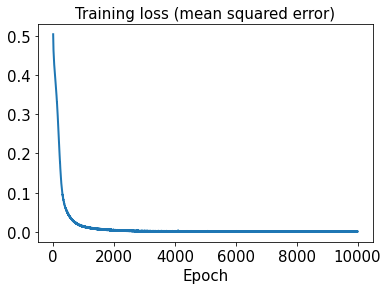

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

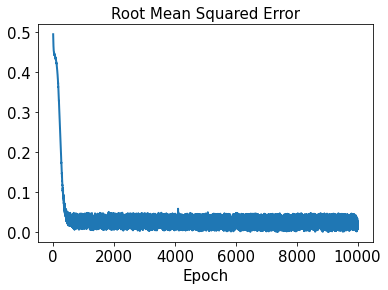

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 102ms/step - loss: 7.1264e-06 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.025464915757082127


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.025782928543738145


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.009181940681918438, 0.03340980570533127, 0.013226957258063039, 0.02547583042897641, 0.02192402384191924, 0.02773723033763695, 0.021929294023763656, 0.005794163126775471, 0.021982922926050984, 0.003612893210459957, 0.004518637101675651, 0.028020241253732234, 0.011852302119152053, 0.03442200441067113, 0.026398743308923483, 0.03147691244150248, 0.007495467895058949, 0.0148230046770881, 0.033572158446628544, 0.005728944135236529, 0.005205812538425582, 0.03447324931688833, 0.003812533720071457, 0.013547033298152957, 0.005369759150376191, 0.026874579265446154, 0.012487244821282103, 0.021218295598749885, 0.01770585582227333, 0.031757569866428276, 0.021677738010808217, 0.010265829534775983, 0.007382171872256794]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.014047215759760348, 0.02385771093309594, 0.02954378146635195, 0.013950810843491946, 0.034767509738324556, 0.011134769400869098, 0.019835776654540147, 0.009624859164080825]


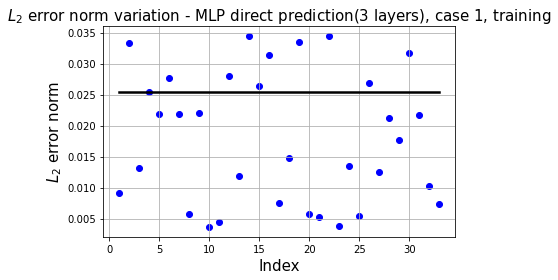

In [105]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

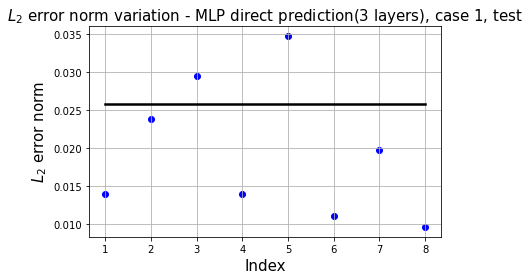

In [106]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(3 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

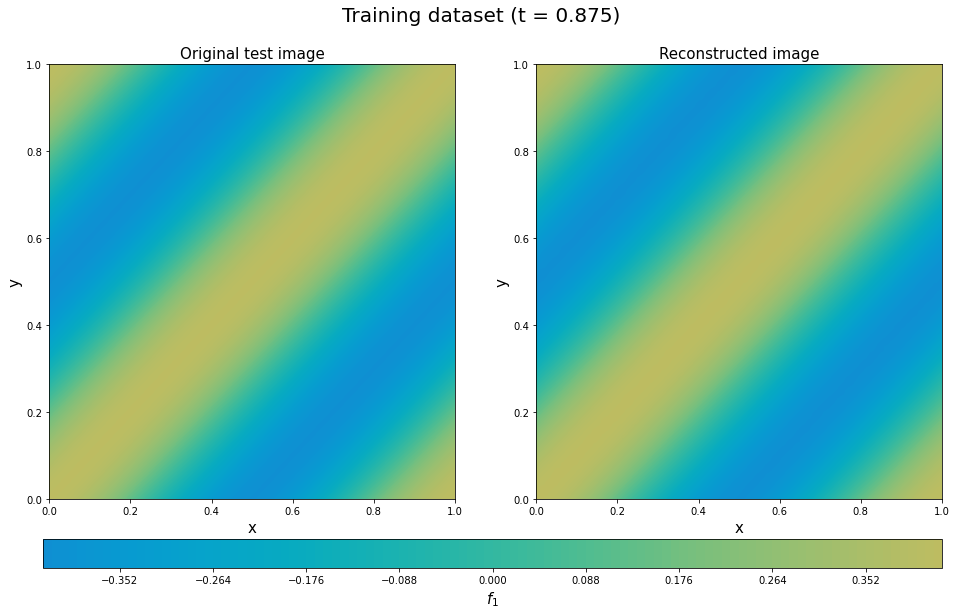

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

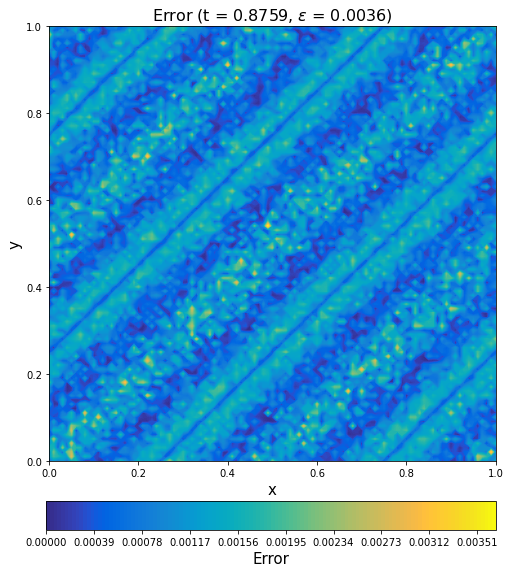

In [36]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

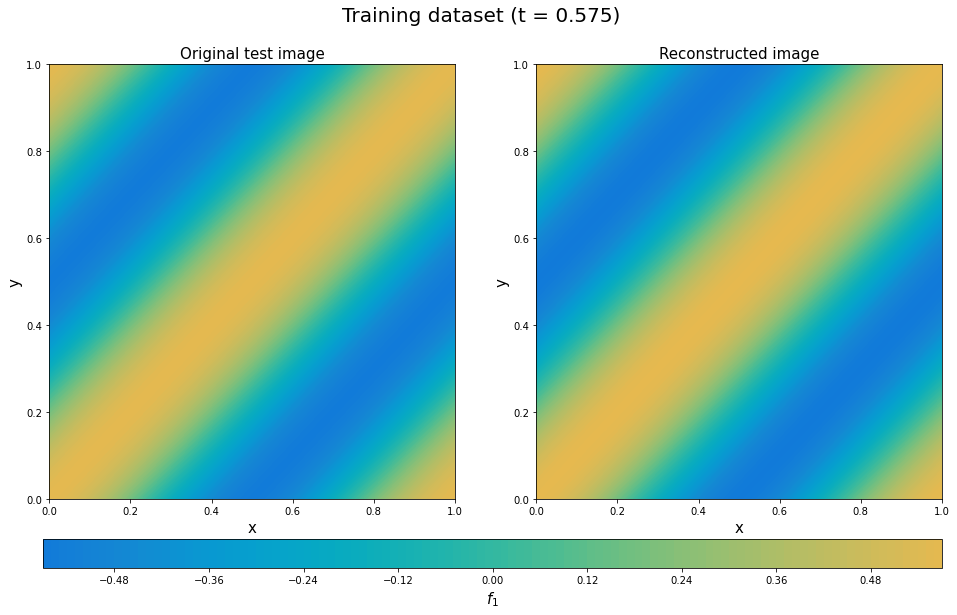

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

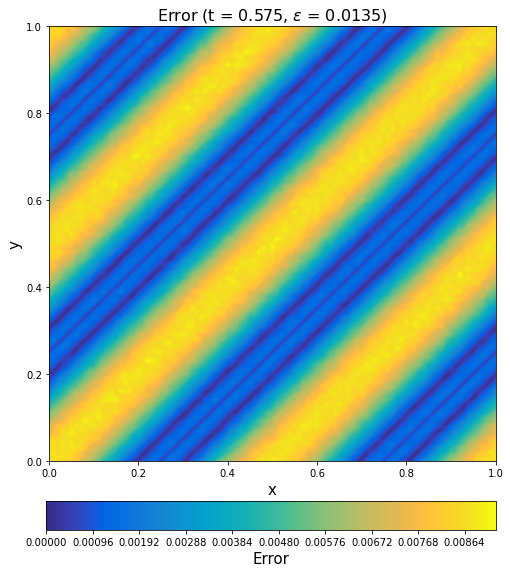

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

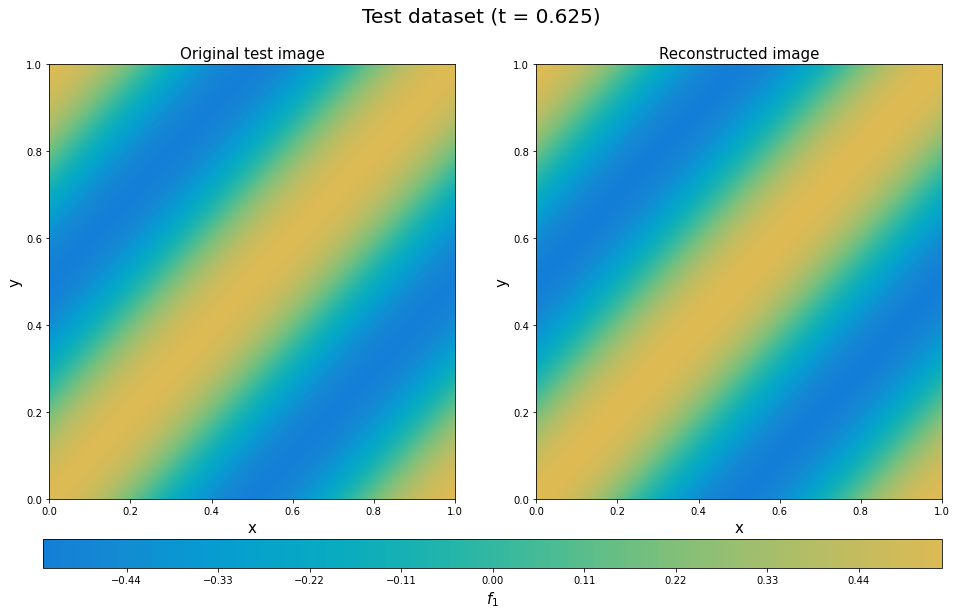

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

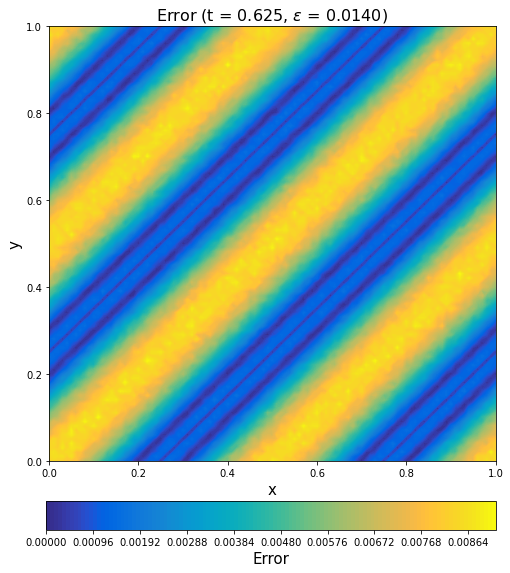

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

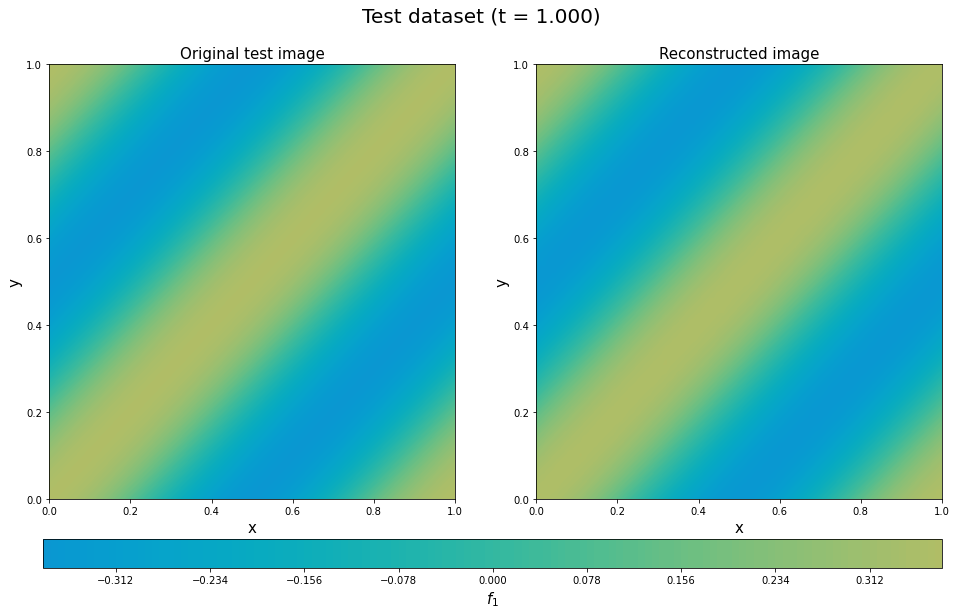

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

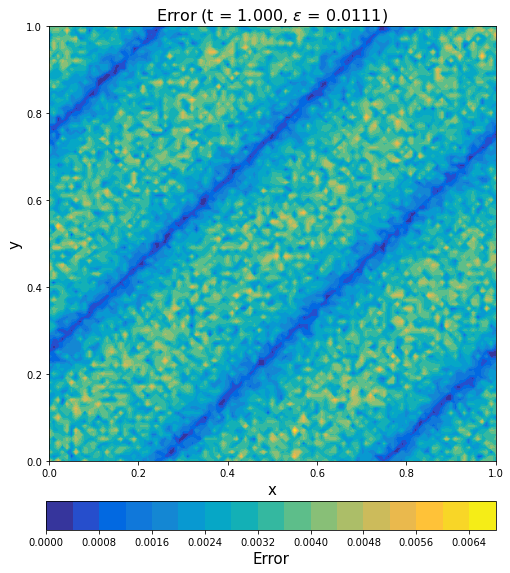

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

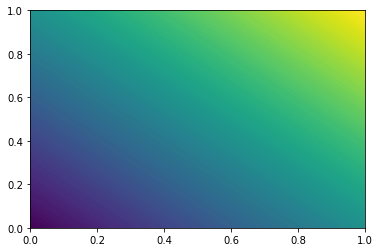

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 22ms/step - loss: 2.6903 - rmse: 1.6402
Epoch 2/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.6768 - rmse: 1.6361
Epoch 3/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.6652 - rmse: 1.6325
Epoch 4/10000
2/2 [==============================] - 0s 19ms/step - loss: 2.6542 - rmse: 1.6292
Epoch 5/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.6442 - rmse: 1.6261
Epoch 6/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6344 - rmse: 1.6231
Epoch 7/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6250 - rmse: 1.6202
Epoch 8/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6160 - rmse: 1.6174
Epoch 9/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6072 - rmse: 1.6147
Epoch 10/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5988 - rmse: 1.6121
Epoch 11/10000
2/2 [========================

2/2 [==============================] - 0s 7ms/step - loss: 2.0069 - rmse: 1.4165
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9959 - rmse: 1.4126
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9928 - rmse: 1.4115
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9841 - rmse: 1.4084
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9758 - rmse: 1.4054
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9687 - rmse: 1.4029
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9650 - rmse: 1.4016
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9537 - rmse: 1.3976
Epoch 94/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9462 - rmse: 1.3949
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9443 - rmse: 1.3942
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 1.3812 - rmse: 1.1751
Epoch 171/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3755 - rmse: 1.1727
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3643 - rmse: 1.1679
Epoch 173/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3611 - rmse: 1.1666
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3537 - rmse: 1.1634
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3460 - rmse: 1.1601
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3412 - rmse: 1.1580
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3260 - rmse: 1.1514
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3235 - rmse: 1.1503
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3119 - rmse: 1.1453
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.8053 - rmse: 0.8973
Epoch 255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8044 - rmse: 0.8968
Epoch 256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7959 - rmse: 0.8921
Epoch 257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7883 - rmse: 0.8878
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7819 - rmse: 0.8842
Epoch 259/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7789 - rmse: 0.8825
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7707 - rmse: 0.8778
Epoch 261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7672 - rmse: 0.8759
Epoch 262/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7605 - rmse: 0.8720
Epoch 263/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7527 - rmse: 0.8675
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.3937 - rmse: 0.6274
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3929 - rmse: 0.6267
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3908 - rmse: 0.6251
Epoch 341/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3886 - rmse: 0.6233
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3809 - rmse: 0.6171
Epoch 343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3751 - rmse: 0.6124
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3703 - rmse: 0.6085
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3672 - rmse: 0.6059
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3676 - rmse: 0.6063
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3616 - rmse: 0.6012
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.1650 - rmse: 0.4062
Epoch 423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1642 - rmse: 0.4051
Epoch 424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1637 - rmse: 0.4045
Epoch 425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1623 - rmse: 0.4028
Epoch 426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1610 - rmse: 0.4011
Epoch 427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1552 - rmse: 0.3938
Epoch 428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1607 - rmse: 0.4008
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1582 - rmse: 0.3976
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1532 - rmse: 0.3914
Epoch 431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1495 - rmse: 0.3866
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0650 - rmse: 0.2547
Epoch 507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0678 - rmse: 0.2602
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0635 - rmse: 0.2519
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0653 - rmse: 0.2554
Epoch 510/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0689 - rmse: 0.2623
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0690 - rmse: 0.2626
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0684 - rmse: 0.2614
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0650 - rmse: 0.2548
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0607 - rmse: 0.2462
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0615 - rmse: 0.2479
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0252 - rmse: 0.1587
Epoch 591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0275 - rmse: 0.1656
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0263 - rmse: 0.1619
Epoch 593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0238 - rmse: 0.1542
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0266 - rmse: 0.1628
Epoch 595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0266 - rmse: 0.1628
Epoch 596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0229 - rmse: 0.1510
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0260 - rmse: 0.1612
Epoch 598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0222 - rmse: 0.1487
Epoch 599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0264 - rmse: 0.1624
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0892
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0944
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0934
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0934
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0921
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 763/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0938
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 767/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0934
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 845/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0079e-04 - rmse: 0.0275
Epoch 846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0826
Epoch 847/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3969e-04 - rmse: 0.0299
Epoch 852/10000
2/2 [=================

2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0879
Epoch 926/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 928/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0854e-04 - rmse: 0.0163
Epoch 929/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 930/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7904e-04 - rmse: 0.0289
Epoch 931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 933/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.0653e-04 - rmse: 0.0190
Epoch 934/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 935/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 1009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 1010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 1011/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4803e-04 - rmse: 0.0103
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8821e-04 - rmse: 0.0157
Epoch 1014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 1015/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1673e-04 - rmse: 0.0132
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 1017/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6289e-04 - rmse: 0.0110
Epoch 1018/10000
2/2 

2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 1091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 1092/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 1093/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 1094/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.4107e-05 - rmse: 0.0067
Epoch 1095/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0940e-04 - rmse: 0.0217
Epoch 1096/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7596e-04 - rmse: 0.0289
Epoch 1097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 1098/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2145e-04 - rmse: 0.0168
Epoch 1099/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 1100/10000

2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 1173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 1174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 1175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9963e-04 - rmse: 0.0128
Epoch 1176/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8001e-04 - rmse: 0.0120
Epoch 1177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0814
Epoch 1178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2065e-04 - rmse: 0.0169
Epoch 1180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 1181/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 1182/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 1255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 1256/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7307e-04 - rmse: 0.0118
Epoch 1257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 1258/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3012e-04 - rmse: 0.0264
Epoch 1259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 1260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 1261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 1262/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8952e-04 - rmse: 0.0160
Epoch 1263/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 1264/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 1337/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 1338/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 1340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 1341/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4407e-05 - rmse: 0.0072
Epoch 1342/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7135e-04 - rmse: 0.0154
Epoch 1343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 1344/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9503e-04 - rmse: 0.0162
Epoch 1345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 1346/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 1420/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3665e-04 - rmse: 0.0103
Epoch 1421/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 1422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 1423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 1424/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1883e-04 - rmse: 0.0197
Epoch 1425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 1426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 1427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 1428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 1429/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 5.6413e-04 - rmse: 0.0231
Epoch 1502/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7890e-04 - rmse: 0.0158
Epoch 1503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 1504/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 1505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 1506/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5066e-04 - rmse: 0.0110
Epoch 1507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 1508/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0878e-04 - rmse: 0.0134
Epoch 1509/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0501e-04 - rmse: 0.0087
Epoch 1510/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4751e-04 - rmse: 0.0286
Epoch 1511/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 1584/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5351e-04 - rmse: 0.0287
Epoch 1585/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7824e-04 - rmse: 0.0255
Epoch 1586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1587/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 1588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 1590/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8791e-04 - rmse: 0.0293
Epoch 1593/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 1666/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 1667/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 1668/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1164e-04 - rmse: 0.0169
Epoch 1669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 1670/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8496e-04 - rmse: 0.0256
Epoch 1671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 1672/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 1673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 1674/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1675/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 3.6041e-04 - rmse: 0.0183
Epoch 1748/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 1749/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 1750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 1751/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7824e-04 - rmse: 0.0188
Epoch 1752/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4982e-04 - rmse: 0.0149
Epoch 1753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 1754/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 1755/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 1756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 1757/10000
2/2 [===

Epoch 1830/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 1831/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5986e-04 - rmse: 0.0153
Epoch 1832/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2903e-04 - rmse: 0.0283
Epoch 1833/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 1834/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6480e-04 - rmse: 0.0155
Epoch 1835/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4189e-04 - rmse: 0.0286
Epoch 1836/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 1837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 1838/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 1839/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0429
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 1913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 1914/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5283e-05 - rmse: 0.0064
Epoch 1915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 1916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1917/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4740e-04 - rmse: 0.0111
Epoch 1918/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 1919/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7516e-04 - rmse: 0.0187
Epoch 1920/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9032e-04 - rmse: 0.0129
Epoch 1921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 1922/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 1995/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 1996/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 1997/10000
2/2 [==============================] - 0s 19ms/step - loss: 8.0019e-04 - rmse: 0.0279
Epoch 1998/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 1999/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 2000/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 2001/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 2002/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 2003/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 2004/10000
2/2 [======

2/2 [==============================] - 0s 6ms/step - loss: 5.0119e-04 - rmse: 0.0219
Epoch 2078/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 2079/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2080/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5807e-04 - rmse: 0.0289
Epoch 2081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 2082/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6606e-04 - rmse: 0.0210
Epoch 2083/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0105e-04 - rmse: 0.0167
Epoch 2084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 2085/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 2086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 2087/10000
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 2160/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 2161/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 2162/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5063e-04 - rmse: 0.0207
Epoch 2163/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 2164/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 2165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 2166/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3387e-04 - rmse: 0.0267
Epoch 2167/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5560e-04 - rmse: 0.0115
Epoch 2168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 2169/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 2243/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0307e-04 - rmse: 0.0168
Epoch 2244/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5836e-04 - rmse: 0.0306
Epoch 2245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 2246/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 2247/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 2248/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3298e-04 - rmse: 0.0203
Epoch 2249/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 2250/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 2251/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 1.8217e-04 - rmse: 0.0127
Epoch 2325/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1926e-04 - rmse: 0.0282
Epoch 2326/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 2327/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9945e-04 - rmse: 0.0167
Epoch 2328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 2329/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9752e-05 - rmse: 0.0076
Epoch 2330/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2289e-05 - rmse: 0.0064
Epoch 2331/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5840e-04 - rmse: 0.0117
Epoch 2332/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8948e-05 - rmse: 0.0027
Epoch 2333/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4531e-04 - rmse: 0.0250
Epoch

2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 2407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 2408/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0132e-04 - rmse: 0.0134
Epoch 2409/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 2410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 2411/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 2412/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 2413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 2415/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4676e-04 - rmse: 0.0250
Epoch 2416/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 2489/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9248e-04 - rmse: 0.0259
Epoch 2490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 2491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 2492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 2493/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8768e-04 - rmse: 0.0258
Epoch 2494/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3091e-04 - rmse: 0.0176
Epoch 2495/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3893e-04 - rmse: 0.0148
Epoch 2496/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 2497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 2498/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 2571/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 2572/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 2573/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8685e-04 - rmse: 0.0163
Epoch 2574/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1592e-04 - rmse: 0.0282
Epoch 2575/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5660e-04 - rmse: 0.0252
Epoch 2576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2577/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 2578/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 2579/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 2580/10000
2/2 [===

Epoch 2653/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 2654/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1394e-04 - rmse: 0.0198
Epoch 2655/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 2656/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 2657/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 2658/10000
2/2 [==============================] - 0s 19ms/step - loss: 3.1788e-04 - rmse: 0.0173
Epoch 2659/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0077 - rmse: 0.0878
Epoch 2660/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 2661/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 2662/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 2

2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2736/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 2737/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 2738/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0091e-05 - rmse: 0.0084
Epoch 2739/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3637e-04 - rmse: 0.0286
Epoch 2740/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9426e-04 - rmse: 0.0166
Epoch 2741/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 2742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 2743/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 2744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0796
Epoch 2745/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 2.4860e-04 - rmse: 0.0151
Epoch 2819/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 2820/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 2821/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 2822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 2823/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0642e-04 - rmse: 0.0221
Epoch 2824/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3139e-04 - rmse: 0.0106
Epoch 2825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 2826/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 2827/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7000e-04 - rmse: 0.0158
Epoch 2828/10000
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 2901/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5523e-04 - rmse: 0.0252
Epoch 2902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 2903/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8341e-04 - rmse: 0.0276
Epoch 2904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 2905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 2906/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 2907/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9112e-04 - rmse: 0.0165
Epoch 2908/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 2909/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 2910/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 2984/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 2985/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 2986/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 2987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0927
Epoch 2988/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 2989/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 2990/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 2991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 2992/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3518e-04 - rmse: 0.0286
Epoch 2993/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 3066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 3067/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 3068/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 3069/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3070/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 3071/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 3072/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 3073/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8815e-04 - rmse: 0.0130
Epoch 3074/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3659e-04 - rmse: 0.0268
Epoch 3075/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 3148/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 3149/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 3150/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 3151/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6619e-04 - rmse: 0.0273
Epoch 3152/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 3153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 3154/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 3155/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 3156/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 3157/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 2.7798e-04 - rmse: 0.0161
Epoch 3231/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 3232/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 3233/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 3234/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6412e-04 - rmse: 0.0157
Epoch 3235/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 3236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3237/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 3238/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7675e-04 - rmse: 0.0214
Epoch 3239/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 3240/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 3313/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 3314/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 3315/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8579e-04 - rmse: 0.0277
Epoch 3316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 3317/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 3318/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9061e-04 - rmse: 0.0193
Epoch 3319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 3320/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 3321/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0958e-04 - rmse: 0.0171
Epoch 3322/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 3395/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3538e-04 - rmse: 0.0204
Epoch 3396/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0200e-04 - rmse: 0.0242
Epoch 3397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 3398/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 3399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 3400/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4947e-04 - rmse: 0.0231
Epoch 3401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 3402/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 3403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 3404/10000
2/2 [===

2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 3477/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 3478/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 3479/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 3480/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 3481/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 3482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 3483/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 3484/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2586e-04 - rmse: 0.0225
Epoch 3485/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9650e-04 - rmse: 0.0241
Epoch 3486/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 3560/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 3561/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 3562/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 3563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 3564/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 3565/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 3566/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 3567/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 3568/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 3569/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 3643/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1198e-04 - rmse: 0.0299
Epoch 3644/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 3645/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 3646/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 3647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0885
Epoch 3648/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 3649/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 3650/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7186e-04 - rmse: 0.0188
Epoch 3651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 3652/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 5.4112e-04 - rmse: 0.0229
Epoch 3725/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8442e-04 - rmse: 0.0163
Epoch 3726/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1341e-04 - rmse: 0.0172
Epoch 3727/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 3728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 3729/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 3730/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3400e-04 - rmse: 0.0147
Epoch 3731/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 3732/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 3733/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 3734/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 3807/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 3808/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0851
Epoch 3809/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 3810/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 3811/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 3812/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 3813/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 3814/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 3815/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 3816/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 3889/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 3890/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 3891/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0850
Epoch 3892/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 3893/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3924e-04 - rmse: 0.0205
Epoch 3894/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2242e-04 - rmse: 0.0301
Epoch 3895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 3896/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 3897/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 3898/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 3971/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 3972/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3973/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 3974/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 3975/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 3976/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4385e-04 - rmse: 0.0207
Epoch 3977/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 3978/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 3979/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7788e-04 - rmse: 0.0127
Epoch 3980/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 4053/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 4054/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 4055/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 4056/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 4057/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 4058/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5816e-05 - rmse: 0.0070
Epoch 4059/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.4887e-05 - rmse: 0.0069
Epoch 4060/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 4061/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5771e-04 - rmse: 0.0253
Epoch 4062/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 4135/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 4136/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 4137/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7467e-04 - rmse: 0.0160
Epoch 4138/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 4139/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 4140/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 4141/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2180e-04 - rmse: 0.0175
Epoch 4142/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7066e-04 - rmse: 0.0124
Epoch 4143/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4819e-04 - rmse: 0.0208
Epoch 4144/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 4217/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 4218/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 4219/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 4220/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 4221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 4222/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 4223/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8913e-04 - rmse: 0.0295
Epoch 4224/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 4225/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 4226/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4300/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 4301/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 4302/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 4303/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3141e-04 - rmse: 0.0248
Epoch 4304/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 4305/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2775e-04 - rmse: 0.0176
Epoch 4306/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3181e-04 - rmse: 0.0147
Epoch 4307/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2183e-04 - rmse: 0.0143
Epoch 4308/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9138e-04 - rmse: 0.0278
Epoch 4309/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 4382/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 4383/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 4384/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 4385/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 4386/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 4387/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3555e-04 - rmse: 0.0109
Epoch 4388/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.5426e-04 - rmse: 0.0232
Epoch 4389/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 4390/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 4391/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 4464/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 4465/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5391e-04 - rmse: 0.0154
Epoch 4466/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0334e-04 - rmse: 0.0169
Epoch 4467/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 4468/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 4469/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 4470/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 4471/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5422e-04 - rmse: 0.0253
Epoch 4472/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0721e-04 - rmse: 0.0198
Epoch 4473/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 4546/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8486e-04 - rmse: 0.0164
Epoch 4547/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 4548/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8730e-04 - rmse: 0.0259
Epoch 4549/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 4550/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 4551/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 4552/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 4553/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9567e-04 - rmse: 0.0167
Epoch 4554/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 4555/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 9.8198e-04 - rmse: 0.0311
Epoch 4628/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 4629/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 4630/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 4631/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6680e-04 - rmse: 0.0274
Epoch 4632/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4390e-04 - rmse: 0.0288
Epoch 4633/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 4634/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 4635/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 4636/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7063e-04 - rmse: 0.0213
Epoch 4637/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 4710/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 4711/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 4712/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4992e-04 - rmse: 0.0116
Epoch 4713/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 4714/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4469e-04 - rmse: 0.0113
Epoch 4715/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 4716/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2889e-04 - rmse: 0.0177
Epoch 4717/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 4718/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 4719/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 4792/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9698e-04 - rmse: 0.0168
Epoch 4793/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 4794/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 4795/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 4796/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8656e-04 - rmse: 0.0164
Epoch 4797/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 4798/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 4799/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4470e-04 - rmse: 0.0113
Epoch 4800/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 4801/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 4875/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7161e-04 - rmse: 0.0125
Epoch 4876/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3343e-04 - rmse: 0.0108
Epoch 4877/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 4878/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 4879/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 4880/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2334e-04 - rmse: 0.0103
Epoch 4881/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 4882/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4494e-04 - rmse: 0.0207
Epoch 4883/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 4884/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 4957/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 4958/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6366e-04 - rmse: 0.0157
Epoch 4959/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 4960/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 4961/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1869e-04 - rmse: 0.0101
Epoch 4962/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 4963/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2699e-04 - rmse: 0.0105
Epoch 4964/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8650e-04 - rmse: 0.0192
Epoch 4965/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 4966/10000
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 0.0087 - rmse: 0.0930
Epoch 5039/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 5040/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 5041/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4001e-04 - rmse: 0.0304
Epoch 5042/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 5043/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 5044/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4734e-04 - rmse: 0.0305
Epoch 5045/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 5046/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8116e-04 - rmse: 0.0277
Epoch 5047/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 5048/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5121/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5122/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 5123/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 5124/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 5125/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 5126/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5127/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 5128/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5129/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 5130/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 7.3660e-04 - rmse: 0.0268
Epoch 5204/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5205/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 5206/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 5207/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5091e-04 - rmse: 0.0116
Epoch 5208/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 5209/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5210/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 5211/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4038e-05 - rmse: 0.0088
Epoch 5212/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 5213/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 4.3031e-05 - rmse: 0.0052
Epoch 5286/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 5287/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4906e-05 - rmse: 0.0030
Epoch 5288/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3173e-04 - rmse: 0.0108
Epoch 5289/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1314e-04 - rmse: 0.0282
Epoch 5290/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 5291/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3506e-05 - rmse: 0.0028
Epoch 5292/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 5293/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 5294/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 5295/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 5368/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 5369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5370/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 5371/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9202e-04 - rmse: 0.0133
Epoch 5372/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1954e-04 - rmse: 0.0143
Epoch 5373/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8571e-04 - rmse: 0.0217
Epoch 5374/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 5375/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 5376/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 5377/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 5450/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2609e-04 - rmse: 0.0285
Epoch 5451/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4284e-05 - rmse: 0.0070
Epoch 5452/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 5453/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 5454/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5455/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1039e-04 - rmse: 0.0282
Epoch 5456/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7465e-05 - rmse: 0.0072
Epoch 5457/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6847e-04 - rmse: 0.0255
Epoch 5458/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 5459/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 5532/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 5533/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 5534/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 5535/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 5536/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7463e-04 - rmse: 0.0310
Epoch 5537/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5538/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 5539/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 5540/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2295e-05 - rmse: 0.0088
Epoch 5541/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 5614/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 5615/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 5616/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1565e-04 - rmse: 0.0245
Epoch 5617/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5368e-04 - rmse: 0.0253
Epoch 5618/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 5619/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5620/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7696e-04 - rmse: 0.0257
Epoch 5621/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 5622/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 5623/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 5696/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 5697/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 5698/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 5699/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 5700/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 5701/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 5702/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 5703/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 5704/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 5705/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 5779/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5780/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9196e-04 - rmse: 0.0260
Epoch 5781/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5475e-04 - rmse: 0.0118
Epoch 5782/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0458e-04 - rmse: 0.0138
Epoch 5783/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 5784/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2982e-04 - rmse: 0.0146
Epoch 5785/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 5786/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8214e-04 - rmse: 0.0238
Epoch 5787/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 5788/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 5861/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5487e-04 - rmse: 0.0118
Epoch 5862/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 5863/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5821e-04 - rmse: 0.0210
Epoch 5864/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9673e-04 - rmse: 0.0168
Epoch 5865/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0436e-04 - rmse: 0.0137
Epoch 5866/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 5867/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8098e-04 - rmse: 0.0129
Epoch 5868/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 5869/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 5870/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 5943/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 5944/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 5945/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8921e-04 - rmse: 0.0312
Epoch 5946/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 5947/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 5948/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 5949/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5950/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 5951/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8462e-04 - rmse: 0.0164
Epoch 5952/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 3.4237e-04 - rmse: 0.0181
Epoch 6025/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 6026/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 6027/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 6028/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 6029/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 6030/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6410e-04 - rmse: 0.0122
Epoch 6031/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6895e-04 - rmse: 0.0124
Epoch 6032/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0753e-04 - rmse: 0.0198
Epoch 6033/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 6034/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 6107/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 6108/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 6109/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 6110/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 6111/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 6112/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 6113/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0999e-04 - rmse: 0.0299
Epoch 6114/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7396e-04 - rmse: 0.0126
Epoch 6115/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 6116/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 2.4001e-04 - rmse: 0.0150
Epoch 6189/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 6190/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6191/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 6192/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 6193/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7118e-04 - rmse: 0.0275
Epoch 6194/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6870e-04 - rmse: 0.0124
Epoch 6195/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6196/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 6197/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 6198/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 6271/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2658e-04 - rmse: 0.0106
Epoch 6272/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4974e-04 - rmse: 0.0208
Epoch 6273/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0635
Epoch 6274/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6275/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6276/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5407e-04 - rmse: 0.0210
Epoch 6277/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6814e-05 - rmse: 0.0072
Epoch 6278/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 6279/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4310e-04 - rmse: 0.0151
Epoch 6280/10000


2/2 [==============================] - 0s 7ms/step - loss: 3.6304e-04 - rmse: 0.0187
Epoch 6354/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 6355/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 6356/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 6357/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 6358/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 6359/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 6360/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 6361/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 6362/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0885
Epoch 6363/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 3.8744e-04 - rmse: 0.0193
Epoch 6437/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 6438/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 6439/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0560e-04 - rmse: 0.0198
Epoch 6440/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0718e-04 - rmse: 0.0243
Epoch 6441/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5139e-04 - rmse: 0.0271
Epoch 6442/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 6443/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 6444/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 6445/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 6446/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 6520/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 6521/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9490e-04 - rmse: 0.0261
Epoch 6522/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6854e-04 - rmse: 0.0159
Epoch 6523/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 6524/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 6525/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1498e-04 - rmse: 0.0283
Epoch 6526/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 6527/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 6528/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 6529/10000
2/2 [

2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 6603/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6604/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 6605/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0519e-04 - rmse: 0.0298
Epoch 6606/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 6607/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 6608/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 6609/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5800e-04 - rmse: 0.0254
Epoch 6610/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 6611/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6612/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6685/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 6686/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 6687/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 6688/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 6689/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 6690/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 6691/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 6692/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 6693/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 6694/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 7.1780e-04 - rmse: 0.0265
Epoch 6768/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 6769/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 6770/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 6771/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 6772/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 6773/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 6774/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 6775/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4481e-04 - rmse: 0.0182
Epoch 6776/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 6777/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 6850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 6851/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 6852/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 6853/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5810e-05 - rmse: 0.0071
Epoch 6854/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 6855/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 6856/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 6857/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4468e-04 - rmse: 0.0251
Epoch 6858/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 6859/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 6932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 6933/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 6934/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 6935/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 6936/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 6937/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8153e-04 - rmse: 0.0163
Epoch 6938/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 6939/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 6940/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 6941/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 7015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 7016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 7017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 7018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 7020/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 7021/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 7022/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 7023/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 7096/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7944e-04 - rmse: 0.0216
Epoch 7097/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 7098/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3471e-04 - rmse: 0.0110
Epoch 7099/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 7100/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7101/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4384e-04 - rmse: 0.0114
Epoch 7102/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 7103/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 7104/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7286e-04 - rmse: 0.0161
Epoch 7105/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 7179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 7180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 7181/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4092e-04 - rmse: 0.0287
Epoch 7182/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.5011e-04 - rmse: 0.0306
Epoch 7183/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7184/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 7185/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 7186/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 7187/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 7260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 7262/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6581e-04 - rmse: 0.0212
Epoch 7263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 7264/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4955e-05 - rmse: 0.0084
Epoch 7265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 7266/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 7267/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 7268/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 7269/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 7343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 7344/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7923e-04 - rmse: 0.0311
Epoch 7345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 7346/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5519e-04 - rmse: 0.0119
Epoch 7347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 7348/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2080e-04 - rmse: 0.0103
Epoch 7349/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 7350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 7351/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 7352/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 7425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 7426/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2672e-04 - rmse: 0.0146
Epoch 7427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 7428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 7429/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8490e-04 - rmse: 0.0192
Epoch 7430/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1632e-04 - rmse: 0.0200
Epoch 7431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 7432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 7433/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 7434/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 7508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 7509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 7510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 7511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 7513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 7514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 7515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 7516/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 7517/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 7591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 7593/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5964e-05 - rmse: 0.0065
Epoch 7594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 7595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 7596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 7598/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6577e-04 - rmse: 0.0123
Epoch 7599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 7600/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 7673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 7674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 7675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 7676/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5959e-04 - rmse: 0.0254
Epoch 7677/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3467e-04 - rmse: 0.0286
Epoch 7678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 7679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 7680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 7681/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3952e-04 - rmse: 0.0206
Epoch 7682/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 7755/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 7756/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 7757/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7758/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 7759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 7760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 7761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 7762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 7763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 7764/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 7838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 7839/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3974e-05 - rmse: 0.0063
Epoch 7840/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8707e-05 - rmse: 0.0074
Epoch 7841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 7842/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6690e-04 - rmse: 0.0292
Epoch 7843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 7844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 7845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 7846/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2831e-04 - rmse: 0.0177
Epoch 7847/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 7920/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 7921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 7922/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1599e-04 - rmse: 0.0265
Epoch 7923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 7924/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 7925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7926/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2978e-04 - rmse: 0.0108
Epoch 7927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 7928/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4614e-04 - rmse: 0.0288
Epoch 7929/10000
2/2 [===

2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 8002/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9816e-04 - rmse: 0.0220
Epoch 8003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 8004/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 8005/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3141e-04 - rmse: 0.0248
Epoch 8006/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 8008/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 8009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 8010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8011/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 8084/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3165e-04 - rmse: 0.0108
Epoch 8085/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 8086/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0215e-05 - rmse: 0.0075
Epoch 8087/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 8088/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 8089/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 8090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8091/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8092/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 8093/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 6.5964e-04 - rmse: 0.0254
Epoch 8166/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6966e-04 - rmse: 0.0275
Epoch 8167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 8168/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 8169/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0849
Epoch 8170/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 8171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 8172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 8173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 8174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 8175/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 8249/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 8250/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 8251/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 8252/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 8253/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 8254/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 8255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 8256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 8257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 8258/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 8331/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5800e-05 - rmse: 0.0091
Epoch 8332/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 8333/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7291e-04 - rmse: 0.0126
Epoch 8334/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6709e-04 - rmse: 0.0292
Epoch 8335/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 8336/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1552e-04 - rmse: 0.0174
Epoch 8337/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2908e-04 - rmse: 0.0107
Epoch 8338/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9027e-04 - rmse: 0.0218
Epoch 8339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 8340/10

2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 8414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 8415/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 8416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 8417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 8418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0907
Epoch 8419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 8420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 8421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 8422/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 8495/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 8496/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 8497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 8498/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4993e-04 - rmse: 0.0117
Epoch 8499/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8363e-04 - rmse: 0.0259
Epoch 8500/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 8501/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5722e-04 - rmse: 0.0185
Epoch 8502/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3432e-04 - rmse: 0.0148
Epoch 8503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 8504/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 4.4505e-04 - rmse: 0.0208
Epoch 8577/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5408e-04 - rmse: 0.0184
Epoch 8578/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6517e-04 - rmse: 0.0255
Epoch 8579/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.0338e-04 - rmse: 0.0243
Epoch 8580/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0851
Epoch 8583/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 8584/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9725e-04 - rmse: 0.0242
Epoch 8585/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8586/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 8659/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1602e-04 - rmse: 0.0142
Epoch 8660/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9687e-04 - rmse: 0.0280
Epoch 8661/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3221e-04 - rmse: 0.0286
Epoch 8662/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5893e-04 - rmse: 0.0157
Epoch 8663/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 8664/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 8665/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1799e-04 - rmse: 0.0201
Epoch 8666/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 8667/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 8668/10000


2/2 [==============================] - 0s 7ms/step - loss: 8.0108e-04 - rmse: 0.0281
Epoch 8742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 8743/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0497e-05 - rmse: 0.0088
Epoch 8744/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 8745/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8746/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 8747/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 8748/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0548e-04 - rmse: 0.0171
Epoch 8749/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 8750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 8751/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 4.5376e-04 - rmse: 0.0210
Epoch 8824/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 8825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 8826/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2943e-04 - rmse: 0.0108
Epoch 8827/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 8828/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8829/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1892e-04 - rmse: 0.0284
Epoch 8830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 8831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 8832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 8833/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 2.7842e-04 - rmse: 0.0163
Epoch 8907/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 8908/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3311e-04 - rmse: 0.0148
Epoch 8909/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5841e-04 - rmse: 0.0186
Epoch 8910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 8911/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0173e-04 - rmse: 0.0197
Epoch 8912/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4785e-04 - rmse: 0.0271
Epoch 8913/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8914/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2015e-04 - rmse: 0.0266
Epoch 8915/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 8916/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 8989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 8990/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1575e-04 - rmse: 0.0101
Epoch 8991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 8992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8993/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 8994/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 8995/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 8996/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 8997/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8732e-04 - rmse: 0.0132
Epoch 8998/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 9071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 9072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 9073/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 9074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 9075/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 9076/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 9077/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9078/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7188e-04 - rmse: 0.0161
Epoch 9079/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8205e-04 - rmse: 0.0216
Epoch 9080/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 1.9570e-04 - rmse: 0.0135
Epoch 9153/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 9154/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9155/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0699e-04 - rmse: 0.0139
Epoch 9156/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.8967e-04 - rmse: 0.0166
Epoch 9157/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 9158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 9159/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 9160/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 9161/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4266e-04 - rmse: 0.0230
Epoch 9162/1000

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 9235/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 9236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 9237/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4253e-04 - rmse: 0.0113
Epoch 9238/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3484e-04 - rmse: 0.0110
Epoch 9239/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 9240/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 9241/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 9242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 9243/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 9244/10000
2/2 [=======

Epoch 9317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 9318/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9160e-04 - rmse: 0.0133
Epoch 9319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 9320/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7229e-04 - rmse: 0.0189
Epoch 9321/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 9322/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 9323/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 9324/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1021e-04 - rmse: 0.0172
Epoch 9325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 9326/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 93

Epoch 9400/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 9401/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 9402/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 9403/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8047e-04 - rmse: 0.0163
Epoch 9404/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 9405/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 9406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 9407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 9408/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9409/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 9410/10000

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 9483/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 9484/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4364e-04 - rmse: 0.0207
Epoch 9485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 9486/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1283e-04 - rmse: 0.0223
Epoch 9487/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 9488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 9489/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 9490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 9491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 9492/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 3.2183e-04 - rmse: 0.0176
Epoch 9566/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 9567/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 9568/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6938e-04 - rmse: 0.0214
Epoch 9569/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 9571/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 9572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 9573/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 9574/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 9575/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 9648/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 9649/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 9650/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 9651/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 9652/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0754e-04 - rmse: 0.0139
Epoch 9653/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9654/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8244e-04 - rmse: 0.0130
Epoch 9655/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 9656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 9657/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 9730/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 9731/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9732/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1468e-04 - rmse: 0.0265
Epoch 9733/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 9734/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5190e-04 - rmse: 0.0253
Epoch 9735/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.6235e-04 - rmse: 0.0255
Epoch 9736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 9737/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 9738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 9739/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 9812/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 9813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 9814/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1471e-04 - rmse: 0.0174
Epoch 9815/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 9816/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4338e-04 - rmse: 0.0207
Epoch 9817/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 9818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 9819/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9820/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2613e-04 - rmse: 0.0203
Epoch 9821/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 9894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 9895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 9896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 9897/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 9898/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5396e-04 - rmse: 0.0307
Epoch 9899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 9900/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 9901/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 9902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0911
Epoch 9903/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 5.8907e-04 - rmse: 0.0240
Epoch 9976/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4530e-04 - rmse: 0.0182
Epoch 9977/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3892e-04 - rmse: 0.0269
Epoch 9978/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 9979/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1305e-04 - rmse: 0.0265
Epoch 9980/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 9981/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 9982/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 9983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 9984/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 9985/10000
2/2 

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:02:51.003596


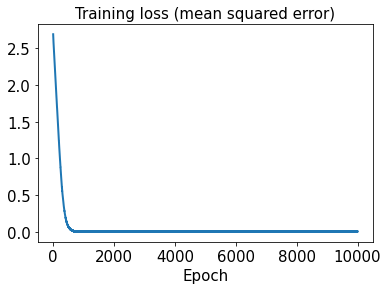

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

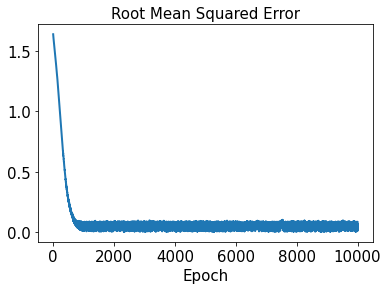

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 80ms/step - loss: 1.3331e-05 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.009217539475384543


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.008958721413932282


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.008586600853017653, 0.010111683146698412, 0.00681888439759065, 0.003804364903637576, 0.0006468684465616388, 0.0067835792687961196, 0.001151352662805322, 0.01028485950159619, 0.0004304403048490421, 0.011809098807921706, 0.011270370850956665, 0.01805390360248691, 0.007416003019031789, 0.011307822038443764, 0.004761470130231462, 0.016592966571280857, 0.009169451064378, 0.0035615358064393482, 0.015190997699837493, 0.009736804447623034, 0.012412542320579633, 0.01384479412206492, 0.012106867631227007, 0.004921529600504715, 0.010748194896383543, 0.005754069996409963, 0.004251467819910133, 0.0013771717405781946, 0.002851538720654088, 0.008960403585586344, 0.00199518131839648, 0.007996512531076295, 0.01271308620707797]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.005572372668004265, 0.002882050275954567, 0.007851719174705667, 0.006204583333869412, 0.012551315437845278, 0.010855314593153552, 0.0021220369793473475, 0.01274563000038065]


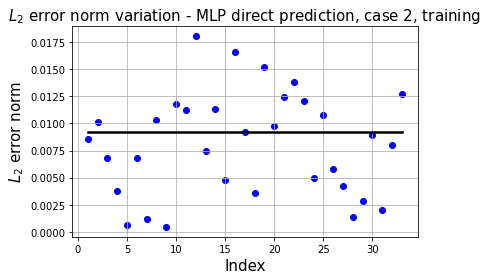

In [65]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

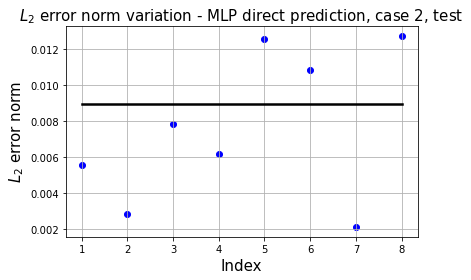

In [66]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

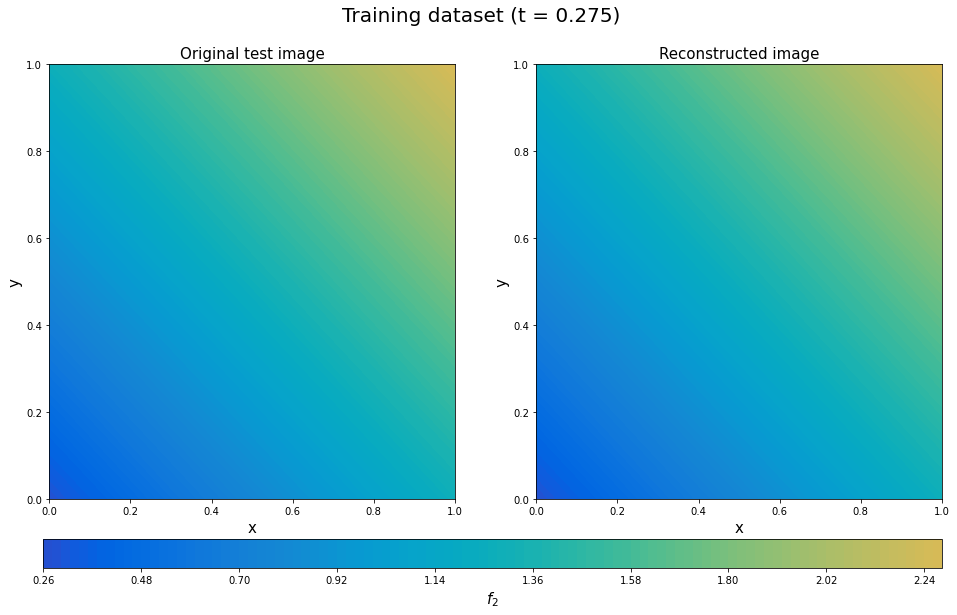

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

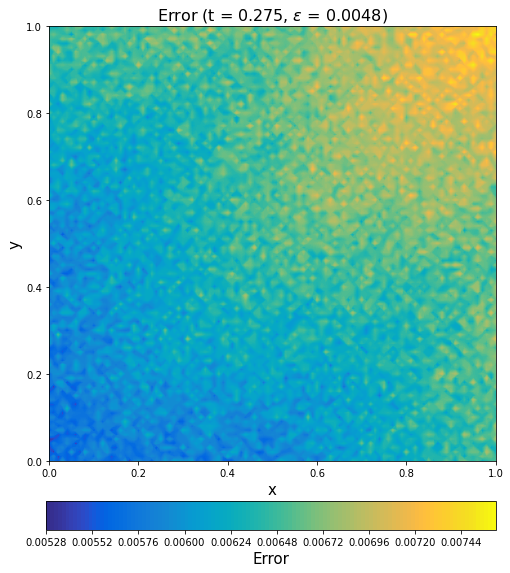

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

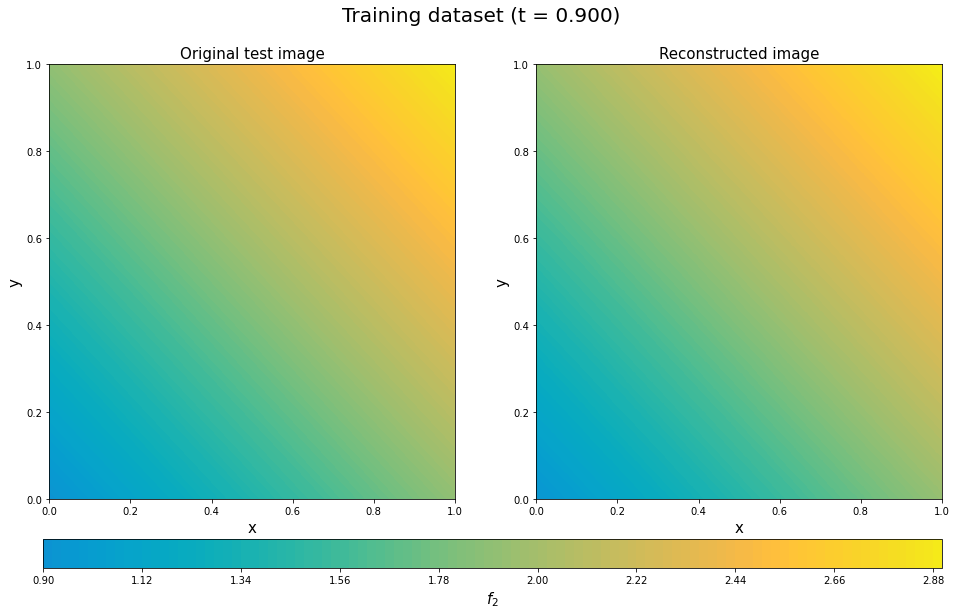

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

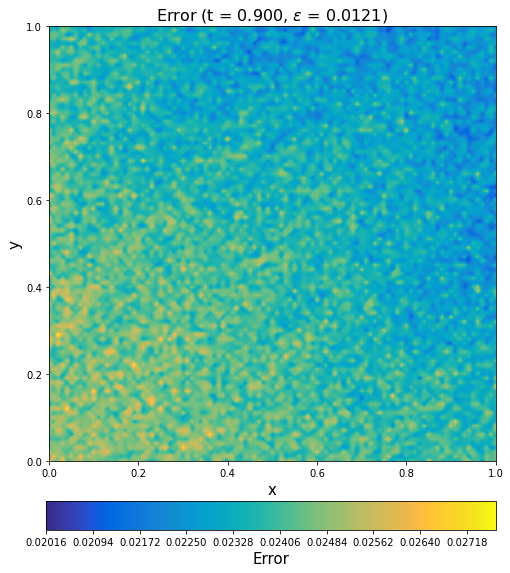

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

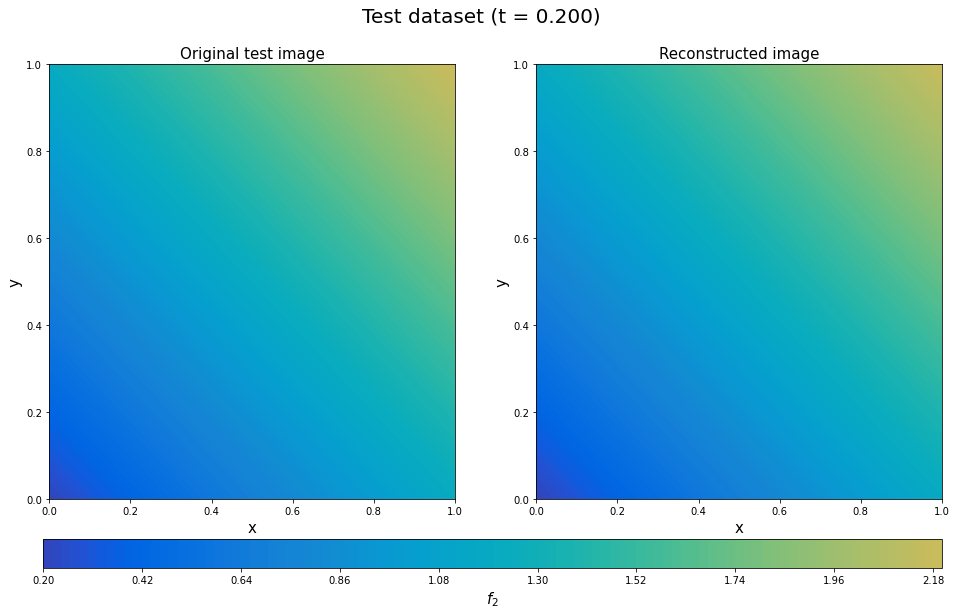

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

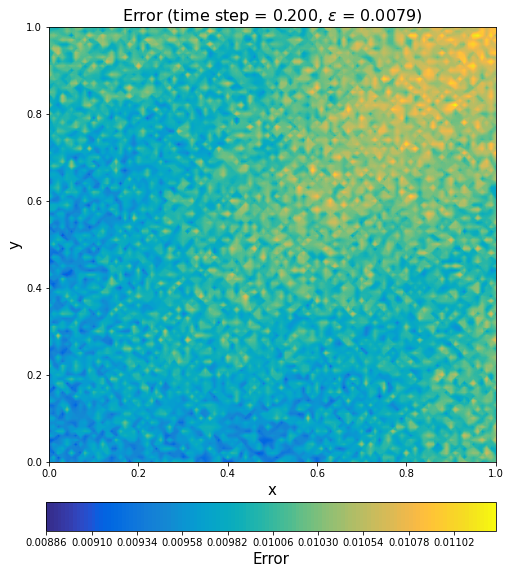

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

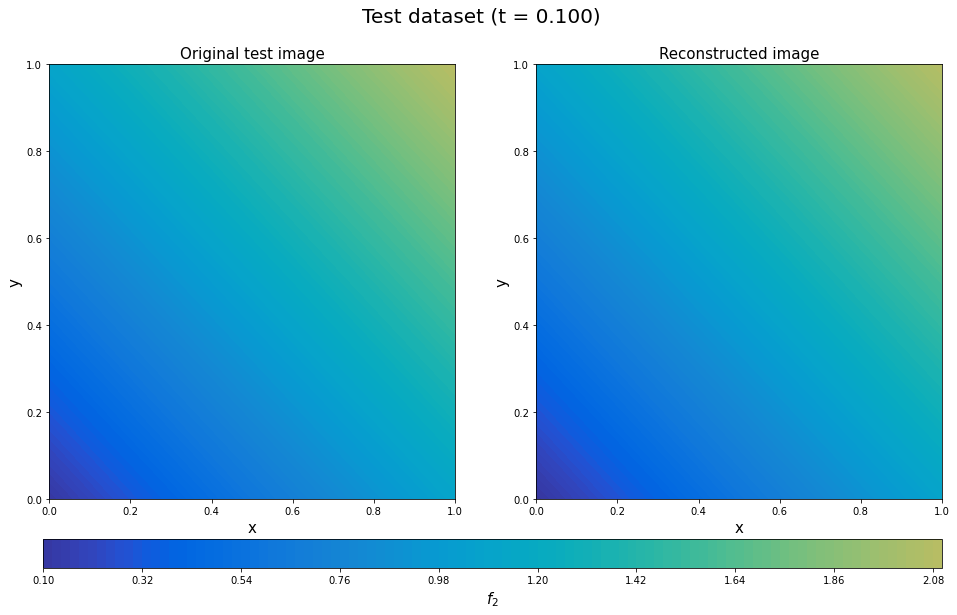

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

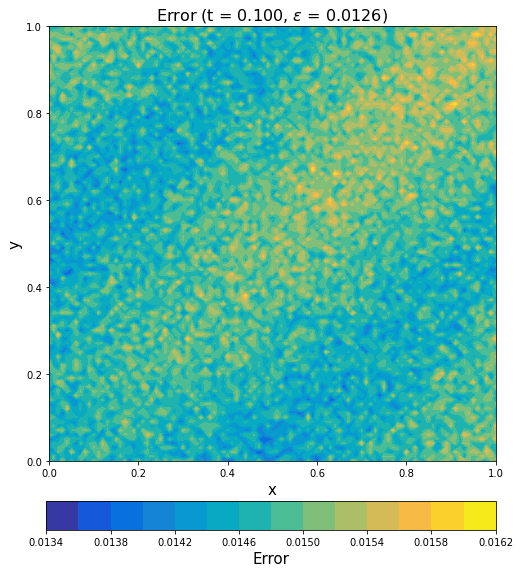

In [74]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

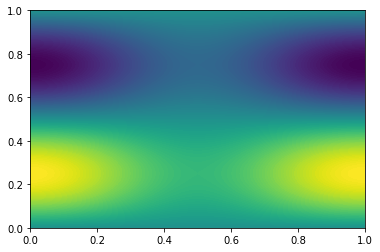

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 21ms/step - loss: 3.8299 - rmse: 1.9570
Epoch 2/10000
2/2 [==============================] - 0s 22ms/step - loss: 3.7898 - rmse: 1.9467
Epoch 3/10000
2/2 [==============================] - 0s 20ms/step - loss: 3.7541 - rmse: 1.9375
Epoch 4/10000
2/2 [==============================] - 0s 23ms/step - loss: 3.7239 - rmse: 1.9297
Epoch 5/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6961 - rmse: 1.9225
Epoch 6/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6696 - rmse: 1.9156
Epoch 7/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6479 - rmse: 1.9099
Epoch 8/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6257 - rmse: 1.9041
Epoch 9/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6046 - rmse: 1.8986
Epoch 10/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5840 - rmse: 1.8932
Epoch 11/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 2.3857 - rmse: 1.5445
Epoch 87/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.3728 - rmse: 1.5404
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3620 - rmse: 1.5369
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3492 - rmse: 1.5327
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3364 - rmse: 1.5285
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3238 - rmse: 1.5244
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3125 - rmse: 1.5207
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3027 - rmse: 1.5174
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2884 - rmse: 1.5127
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2782 - rmse: 1.5093
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 1.6013 - rmse: 1.2653
Epoch 171/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5966 - rmse: 1.2635
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5882 - rmse: 1.2601
Epoch 173/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5809 - rmse: 1.2572
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5759 - rmse: 1.2553
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5694 - rmse: 1.2527
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5606 - rmse: 1.2491
Epoch 177/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5540 - rmse: 1.2465
Epoch 178/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5476 - rmse: 1.2439
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5425 - rmse: 1.2419
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 1.1312 - rmse: 1.0634
Epoch 255/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1287 - rmse: 1.0623
Epoch 256/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1292 - rmse: 1.0625
Epoch 257/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1204 - rmse: 1.0584
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1156 - rmse: 1.0561
Epoch 259/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1081 - rmse: 1.0525
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1035 - rmse: 1.0503
Epoch 261/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0990 - rmse: 1.0482
Epoch 262/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0955 - rmse: 1.0465
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0943 - rmse: 1.0459
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.8163 - rmse: 0.9034
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8153 - rmse: 0.9028
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8171 - rmse: 0.9038
Epoch 341/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8091 - rmse: 0.8993
Epoch 342/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8068 - rmse: 0.8981
Epoch 343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.8032 - rmse: 0.8960
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7977 - rmse: 0.8930
Epoch 345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7973 - rmse: 0.8928
Epoch 346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7935 - rmse: 0.8906
Epoch 347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.7897 - rmse: 0.8885
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.5965 - rmse: 0.7721
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5905 - rmse: 0.7682
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5903 - rmse: 0.7681
Epoch 425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5864 - rmse: 0.7656
Epoch 426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5841 - rmse: 0.7641
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5853 - rmse: 0.7649
Epoch 428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5835 - rmse: 0.7637
Epoch 429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.5778 - rmse: 0.7599
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5757 - rmse: 0.7586
Epoch 431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5736 - rmse: 0.7572
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.4321 - rmse: 0.6572
Epoch 507/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4313 - rmse: 0.6565
Epoch 508/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4289 - rmse: 0.6547
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4258 - rmse: 0.6523
Epoch 510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4244 - rmse: 0.6513
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4238 - rmse: 0.6508
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4227 - rmse: 0.6499
Epoch 513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4209 - rmse: 0.6485
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4187 - rmse: 0.6469
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4204 - rmse: 0.6482
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.3087 - rmse: 0.5554
Epoch 591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3103 - rmse: 0.5569
Epoch 592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3096 - rmse: 0.5562
Epoch 593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3101 - rmse: 0.5566
Epoch 594/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3064 - rmse: 0.5533
Epoch 595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3034 - rmse: 0.5507
Epoch 596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3017 - rmse: 0.5491
Epoch 597/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2994 - rmse: 0.5470
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2977 - rmse: 0.5454
Epoch 599/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2963 - rmse: 0.5442
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.2110 - rmse: 0.4591
Epoch 675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2101 - rmse: 0.4582
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2088 - rmse: 0.4568
Epoch 677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2123 - rmse: 0.4605
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2110 - rmse: 0.4591
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2090 - rmse: 0.4570
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2059 - rmse: 0.4536
Epoch 681/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2057 - rmse: 0.4533
Epoch 682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2089 - rmse: 0.4569
Epoch 683/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2024 - rmse: 0.4497
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.1367 - rmse: 0.3695
Epoch 759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1369 - rmse: 0.3699
Epoch 760/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1389 - rmse: 0.3726
Epoch 761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1363 - rmse: 0.3690
Epoch 762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1371 - rmse: 0.3701
Epoch 763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1389 - rmse: 0.3725
Epoch 764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1326 - rmse: 0.3639
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1362 - rmse: 0.3688
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1328 - rmse: 0.3643
Epoch 767/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1363 - rmse: 0.3691
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0871 - rmse: 0.2949
Epoch 843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0872 - rmse: 0.2951
Epoch 844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0861 - rmse: 0.2932
Epoch 845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0905 - rmse: 0.3006
Epoch 846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0866 - rmse: 0.2941
Epoch 847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0863 - rmse: 0.2937
Epoch 848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0875 - rmse: 0.2955
Epoch 849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0827 - rmse: 0.2873
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0852 - rmse: 0.2916
Epoch 851/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0823 - rmse: 0.2866
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0502 - rmse: 0.2238
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0589 - rmse: 0.2426
Epoch 928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0497 - rmse: 0.2228
Epoch 929/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0524 - rmse: 0.2288
Epoch 930/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0524 - rmse: 0.2287
Epoch 931/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0552 - rmse: 0.2348
Epoch 932/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0493 - rmse: 0.2218
Epoch 933/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0507 - rmse: 0.2250
Epoch 934/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0492 - rmse: 0.2215
Epoch 935/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0471 - rmse: 0.2168
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0314 - rmse: 0.1770
Epoch 1011/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0282 - rmse: 0.1676
Epoch 1012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.1668
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0281 - rmse: 0.1675
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0371 - rmse: 0.1924
Epoch 1015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0277 - rmse: 0.1661
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0304 - rmse: 0.1740
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0311 - rmse: 0.1760
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0268 - rmse: 0.1634
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0327 - rmse: 0.1805
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0238 - rmse: 0.1539
Epoch 1094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0182 - rmse: 0.1346
Epoch 1095/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 1096/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 1097/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0188 - rmse: 0.1369
Epoch 1098/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0194 - rmse: 0.1390
Epoch 1099/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0185 - rmse: 0.1358
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 1101/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0165 - rmse: 0.1282
Epoch 1102/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0089 - rmse: 0.0941
Epoch 1177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0943
Epoch 1178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0118 - rmse: 0.1082
Epoch 1179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0178 - rmse: 0.1331
Epoch 1180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.1004
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0934
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0924
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0950
Epoch 1185/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0890
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 1260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 1261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 1262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0730
Epoch 1265/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0892
Epoch 1267/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 1268/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 1343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 1344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 1345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 1347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 1349/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 1351/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 8.3748e-04 - rmse: 0.0278
Epoch 1426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 1427/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 1428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 1429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 1430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 1431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 1432/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 1433/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8712e-04 - rmse: 0.0287
Epoch 1434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 1435/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 4.9536e-04 - rmse: 0.0209
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7779e-04 - rmse: 0.0228
Epoch 1510/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8684e-04 - rmse: 0.0207
Epoch 1511/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 1513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 1514/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.5828e-04 - rmse: 0.0200
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7171e-04 - rmse: 0.0203
Epoch 1516/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1517/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0860
Epoch 1518/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 1591/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5755e-04 - rmse: 0.0200
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 1593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 1595/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3179e-04 - rmse: 0.0193
Epoch 1596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 1598/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4991e-04 - rmse: 0.0171
Epoch 1599/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8486e-04 - rmse: 0.0207
Epoch 1600/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 1673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 1674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 1675/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7346e-04 - rmse: 0.0204
Epoch 1676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1677/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6951e-04 - rmse: 0.0106
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4113e-04 - rmse: 0.0092
Epoch 1679/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3886e-04 - rmse: 0.0220
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 1681/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4555e-04 - rmse: 0.0094
Epoch 1682/10000


2/2 [==============================] - 0s 8ms/step - loss: 3.4299e-04 - rmse: 0.0170
Epoch 1755/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 1756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1757/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6640e-04 - rmse: 0.0247
Epoch 1758/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8617e-04 - rmse: 0.0230
Epoch 1759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 1760/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 1761/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1686e-04 - rmse: 0.0162
Epoch 1762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1763/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 1764/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 1837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 1838/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 1839/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 1840/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6161e-04 - rmse: 0.0284
Epoch 1841/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 1842/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 1843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 1845/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 1846/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 7.9853e-04 - rmse: 0.0273
Epoch 1919/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 1920/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 1921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 1922/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 1923/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 1924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 1925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 1926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 1927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 1928/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.1002
Epoch 2002/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5976e-04 - rmse: 0.0176
Epoch 2003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 2004/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9405e-04 - rmse: 0.0185
Epoch 2005/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 2006/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 2007/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 2008/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 2009/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2715e-04 - rmse: 0.0218
Epoch 2010/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6159e-04 - rmse: 0.0247
Epoch 2011/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 2084/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 2085/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 2086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 2087/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 2088/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5118e-04 - rmse: 0.0200
Epoch 2089/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0970
Epoch 2090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 2091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 2092/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 2093/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 2.0739e-04 - rmse: 0.0126
Epoch 2166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 2167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 2168/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4368e-04 - rmse: 0.0139
Epoch 2169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 2170/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6083e-04 - rmse: 0.0145
Epoch 2171/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9483e-04 - rmse: 0.0186
Epoch 2172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 2173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 2174/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0386e-04 - rmse: 0.0275
Epoch 2175/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 2248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 2249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 2250/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7632e-04 - rmse: 0.0113
Epoch 2251/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 2252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 2253/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 2254/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 2255/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1311e-04 - rmse: 0.0216
Epoch 2256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 2257/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 2330/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 2331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 2332/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 2333/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.8065e-04 - rmse: 0.0271
Epoch 2334/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 2335/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8279e-04 - rmse: 0.0231
Epoch 2336/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 2337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 2338/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 2339/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 2413/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4412e-04 - rmse: 0.0223
Epoch 2414/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3830e-04 - rmse: 0.0222
Epoch 2415/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 2416/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 2417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 2418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 2419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 2420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 2421/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0644e-04 - rmse: 0.0190
Epoch 2422/10000
2/2 [===

Epoch 2495/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 2496/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 2497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 2498/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 2499/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 2500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2501/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0137e-04 - rmse: 0.0293
Epoch 2502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 2503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 2504/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1792e-04 - rmse: 0.0278
Epoch 2505/1

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 2578/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 2579/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 2580/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 2581/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 2582/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9532e-04 - rmse: 0.0235
Epoch 2583/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0940e-04 - rmse: 0.0258
Epoch 2584/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 2585/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6139e-04 - rmse: 0.0147
Epoch 2586/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2214e-04 - rmse: 0.0219
Epoch 2587/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 2660/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6548e-05 - rmse: 0.0057
Epoch 2661/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 2662/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 2663/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5341e-04 - rmse: 0.0145
Epoch 2664/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8839e-04 - rmse: 0.0186
Epoch 2665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 2666/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0837
Epoch 2667/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4732e-04 - rmse: 0.0143
Epoch 2668/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0533e-04 - rmse: 0.0294
Epoch 2669/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 2742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 2743/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 2744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 2745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 2746/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 2747/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7070e-04 - rmse: 0.0230
Epoch 2748/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 2749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 2750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 2751/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 2825/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 2826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 2827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 2828/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 2829/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 2830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2831/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6394e-04 - rmse: 0.0149
Epoch 2832/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 2833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 2834/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 2908/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 2909/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 2910/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7264e-04 - rmse: 0.0208
Epoch 2911/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 2912/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 2913/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2914/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 2915/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3749e-04 - rmse: 0.0172
Epoch 2916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 2917/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 5.8361e-04 - rmse: 0.0233
Epoch 2990/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0843e-04 - rmse: 0.0238
Epoch 2991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 2992/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4733e-04 - rmse: 0.0246
Epoch 2993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 2994/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0981
Epoch 2995/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 2996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 2997/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9934e-04 - rmse: 0.0236
Epoch 2998/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 2999/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 3073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 3074/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 3075/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 3076/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 3077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 3078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 3079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 3080/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 3081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 3082/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 3156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 3157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 3158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 3159/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9063e-04 - rmse: 0.0235
Epoch 3160/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 3161/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6550e-04 - rmse: 0.0181
Epoch 3162/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9444e-04 - rmse: 0.0236
Epoch 3163/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 3164/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 3165/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 3238/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 3239/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 3240/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 3241/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 3242/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8900e-04 - rmse: 0.0123
Epoch 3243/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 3244/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 3245/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 3246/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4723e-04 - rmse: 0.0247
Epoch 3247/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 2.1945e-04 - rmse: 0.0135
Epoch 3321/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5975e-04 - rmse: 0.0110
Epoch 3322/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1017e-04 - rmse: 0.0193
Epoch 3323/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1789e-04 - rmse: 0.0089
Epoch 3324/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 3325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 3326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 3327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 3328/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 3329/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 3330/10000
2/2 

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 3403/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 3404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 3405/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 3406/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 3407/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2334e-05 - rmse: 0.0074
Epoch 3408/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 3409/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 3410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0835
Epoch 3411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3412/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 3485/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2868e-04 - rmse: 0.0138
Epoch 3486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 3487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 3488/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 3489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 3490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 3491/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 3492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 3493/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1513e-04 - rmse: 0.0279
Epoch 3494/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 3567/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 3568/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8128e-04 - rmse: 0.0273
Epoch 3569/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 3570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 3571/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 3572/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 3573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 3574/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6281e-04 - rmse: 0.0229
Epoch 3575/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 3576/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 5.4239e-04 - rmse: 0.0225
Epoch 3649/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9800e-04 - rmse: 0.0127
Epoch 3650/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 3651/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6200e-04 - rmse: 0.0229
Epoch 3652/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 3653/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8580e-04 - rmse: 0.0212
Epoch 3654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 3655/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 3656/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 3657/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 3658/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 3732/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 3733/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 3734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 3735/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 3736/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 3737/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 3738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 3739/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 3740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 3741/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 3815/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 3816/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 3817/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 3818/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 3819/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 3820/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1827e-04 - rmse: 0.0280
Epoch 3821/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 3822/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5987e-04 - rmse: 0.0250
Epoch 3823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0862
Epoch 3824/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 3898/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 3899/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 3900/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 3901/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 3902/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 3903/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 3904/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 3905/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 3906/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 3907/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 6.1551e-04 - rmse: 0.0241
Epoch 3980/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 3981/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 3982/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3573e-04 - rmse: 0.0174
Epoch 3983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 3984/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 3985/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 3986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 3987/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8931e-04 - rmse: 0.0189
Epoch 3988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 3989/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 4063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 4064/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 4065/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4892e-04 - rmse: 0.0178
Epoch 4066/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 4067/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 4068/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1613e-04 - rmse: 0.0091
Epoch 4069/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 4070/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4175e-04 - rmse: 0.0104
Epoch 4071/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 4072/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 4146/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 4147/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 4148/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3702e-04 - rmse: 0.0102
Epoch 4149/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 4150/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 4151/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 4152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 4153/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4602e-04 - rmse: 0.0227
Epoch 4154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 4155/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 4228/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 4229/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 4230/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 4231/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1196e-04 - rmse: 0.0279
Epoch 4232/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3155e-04 - rmse: 0.0141
Epoch 4233/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7215e-04 - rmse: 0.0184
Epoch 4234/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3298e-04 - rmse: 0.0100
Epoch 4235/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 4236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 4237/10000
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 4310/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 4311/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4312/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 4313/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4699e-04 - rmse: 0.0147
Epoch 4314/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 4315/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8877e-04 - rmse: 0.0189
Epoch 4316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 4317/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6160e-04 - rmse: 0.0230
Epoch 4318/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6765e-04 - rmse: 0.0183
Epoch 4319/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 2.6522e-04 - rmse: 0.0153
Epoch 4392/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0672e-04 - rmse: 0.0218
Epoch 4393/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 4394/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 4395/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 4396/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 4397/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 4398/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4506e-04 - rmse: 0.0204
Epoch 4399/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 4400/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 4401/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 4474/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 4475/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 4476/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 4477/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 4478/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 4479/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 4480/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 4481/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 4482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 4483/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 9.5992e-04 - rmse: 0.0305
Epoch 4556/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0209e-04 - rmse: 0.0259
Epoch 4557/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 4558/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 4559/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 4560/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 4561/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 4562/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 4563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 4564/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3313e-04 - rmse: 0.0101
Epoch 4565/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 4638/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 4639/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9281e-04 - rmse: 0.0257
Epoch 4640/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 4641/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 4642/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5403e-04 - rmse: 0.0180
Epoch 4643/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5197e-04 - rmse: 0.0149
Epoch 4644/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 4645/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8919e-04 - rmse: 0.0161
Epoch 4646/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 4647/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 4720/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 4721/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4330e-04 - rmse: 0.0107
Epoch 4722/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3881e-04 - rmse: 0.0104
Epoch 4723/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5125e-04 - rmse: 0.0110
Epoch 4724/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 4725/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 4726/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 4727/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 4728/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 4729/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 4802/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 4803/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1783e-04 - rmse: 0.0137
Epoch 4804/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5120e-04 - rmse: 0.0149
Epoch 4805/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 4806/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 4807/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 4808/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 4809/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5371e-04 - rmse: 0.0229
Epoch 4810/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 4811/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 4884/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 4885/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 4886/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 4887/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 4888/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 4889/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6401e-04 - rmse: 0.0306
Epoch 4890/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 4891/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5171e-04 - rmse: 0.0111
Epoch 4892/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3488e-04 - rmse: 0.0103
Epoch 4893/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 2.5206e-04 - rmse: 0.0149
Epoch 4966/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8706e-04 - rmse: 0.0126
Epoch 4967/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 4968/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 4969/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 4970/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 4971/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 4972/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3761e-04 - rmse: 0.0104
Epoch 4973/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 4974/10000
2/2 [==============================] - 0s 19ms/step - loss: 1.3609e-04 - rmse: 0.0104
Epoch 4975/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 5048/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 5049/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 5050/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 5051/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5052/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 5053/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3051e-04 - rmse: 0.0224
Epoch 5054/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 5055/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 5056/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8394e-04 - rmse: 0.0293
Epoch 5057/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5130/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 5131/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 5132/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 5133/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1850e-04 - rmse: 0.0281
Epoch 5134/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5135/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 5136/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 5137/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7292e-04 - rmse: 0.0186
Epoch 5138/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 5139/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 7.7168e-04 - rmse: 0.0273
Epoch 5212/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 5213/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3145e-04 - rmse: 0.0102
Epoch 5214/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 5215/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5216/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 5217/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 5218/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4723e-04 - rmse: 0.0148
Epoch 5219/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3144e-04 - rmse: 0.0174
Epoch 5220/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9426e-04 - rmse: 0.0129
Epoch 5221/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 5294/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 5295/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8685e-04 - rmse: 0.0310
Epoch 5296/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 5297/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1572e-04 - rmse: 0.0094
Epoch 5298/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 5299/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 5300/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 5301/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3563e-04 - rmse: 0.0144
Epoch 5302/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 5303/10000
2/2 [===

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 5376/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 5377/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 5378/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 5379/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 5380/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 5381/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1885e-04 - rmse: 0.0263
Epoch 5382/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 5383/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 5384/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 5385/10000
2/2 [===========

Epoch 5458/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 5459/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 5460/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2101e-04 - rmse: 0.0282
Epoch 5461/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0701
Epoch 5462/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 5463/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4563e-04 - rmse: 0.0249
Epoch 5464/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5465/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0093e-04 - rmse: 0.0260
Epoch 5466/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7754e-04 - rmse: 0.0235
Epoch 5467/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0786
Epoc

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 5541/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 5542/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4160e-04 - rmse: 0.0107
Epoch 5543/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 5544/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 5545/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 5546/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6505e-04 - rmse: 0.0155
Epoch 5547/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2191e-04 - rmse: 0.0098
Epoch 5548/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 5549/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9003e-04 - rmse: 0.0128
Epoch 5550/10000
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 2.6080e-04 - rmse: 0.0153
Epoch 5624/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 5625/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 5626/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8282e-04 - rmse: 0.0214
Epoch 5627/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 5628/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 5629/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3678e-04 - rmse: 0.0145
Epoch 5630/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 5631/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 5632/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5438e-04 - rmse: 0.0181
Epoch 5633/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 4.6853e-04 - rmse: 0.0210
Epoch 5706/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5707/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8926e-04 - rmse: 0.0237
Epoch 5708/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1225e-04 - rmse: 0.0242
Epoch 5709/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5710/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5498e-04 - rmse: 0.0288
Epoch 5711/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6423e-04 - rmse: 0.0272
Epoch 5712/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5192e-04 - rmse: 0.0206
Epoch 5713/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 5714/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6175e-04 - rmse: 0.0209
Epoch 571

2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 5788/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3775e-04 - rmse: 0.0226
Epoch 5789/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 5790/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9704e-04 - rmse: 0.0131
Epoch 5791/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2499e-04 - rmse: 0.0283
Epoch 5792/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 5793/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 5794/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 5795/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5432e-04 - rmse: 0.0288
Epoch 5796/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 5797/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 5870/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7096e-04 - rmse: 0.0211
Epoch 5871/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5872/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 5873/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8987e-04 - rmse: 0.0128
Epoch 5874/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5282e-04 - rmse: 0.0151
Epoch 5875/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 5876/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1551e-04 - rmse: 0.0138
Epoch 5877/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 5878/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1375e-05 - rmse: 0.0051
Epoch 5879/10000


2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 5952/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5953/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 5954/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7320e-04 - rmse: 0.0274
Epoch 5955/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 5956/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 5957/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 5958/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4046e-04 - rmse: 0.0204
Epoch 5959/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3322e-04 - rmse: 0.0144
Epoch 5960/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 5961/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 6035/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 6036/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 6037/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3726e-04 - rmse: 0.0203
Epoch 6038/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0624e-04 - rmse: 0.0195
Epoch 6039/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 6040/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 6041/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 6042/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 6043/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 6044/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6117/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 6118/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 6119/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 6120/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 6121/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0856
Epoch 6122/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 6123/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 6124/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 6125/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3254e-04 - rmse: 0.0247
Epoch 6126/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 6199/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 6200/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 6201/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1443e-04 - rmse: 0.0298
Epoch 6202/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 6203/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6204/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4332e-04 - rmse: 0.0286
Epoch 6205/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 6206/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 6207/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 6208/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 6281/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 6282/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 6283/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 6284/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 6285/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 6286/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.1105e-04 - rmse: 0.0093
Epoch 6287/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 6288/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 6289/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 6290/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 6363/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 6364/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6678e-04 - rmse: 0.0185
Epoch 6365/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 6366/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 6367/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 6368/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7755e-04 - rmse: 0.0213
Epoch 6369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 6370/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 6371/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8742e-04 - rmse: 0.0162
Epoch 6372/10000
2/2 [===

2/2 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 6445/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6446/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 6447/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7750e-04 - rmse: 0.0213
Epoch 6448/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 6449/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 6450/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 6451/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6301e-04 - rmse: 0.0232
Epoch 6452/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 6453/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6454/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 6528/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8060e-04 - rmse: 0.0189
Epoch 6529/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 6530/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2963e-05 - rmse: 0.0032
Epoch 6531/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 6532/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 6533/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3889e-04 - rmse: 0.0178
Epoch 6534/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 6535/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 6536/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 6537/10000
2/2

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 6610/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 6611/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 6612/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6565e-04 - rmse: 0.0290
Epoch 6613/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 6614/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 6615/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3925e-04 - rmse: 0.0108
Epoch 6616/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 6617/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6260e-04 - rmse: 0.0184
Epoch 6618/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 6619/10000
2/2 [===

Epoch 6692/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6693/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 6694/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 6695/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 6696/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 6697/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 6698/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9782e-04 - rmse: 0.0279
Epoch 6699/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6700/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5576e-04 - rmse: 0.0252
Epoch 6701/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 6702/1

2/2 [==============================] - 0s 8ms/step - loss: 6.8292e-04 - rmse: 0.0257
Epoch 6775/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6776/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 6777/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 6778/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 6779/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 6780/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9689e-04 - rmse: 0.0132
Epoch 6781/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6782/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 6783/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 6784/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 6857/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 6858/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 6859/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 6860/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 6861/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 6862/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 6863/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 6864/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7543e-04 - rmse: 0.0213
Epoch 6865/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 6866/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 6939/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3231e-04 - rmse: 0.0145
Epoch 6940/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5645e-05 - rmse: 0.0074
Epoch 6941/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5950e-04 - rmse: 0.0184
Epoch 6942/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5600e-04 - rmse: 0.0208
Epoch 6943/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1263e-04 - rmse: 0.0096
Epoch 6944/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.9723e-04 - rmse: 0.0312
Epoch 6945/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 6946/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 6947/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 6948/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 7021/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 7022/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 7023/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 7024/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.5124e-04 - rmse: 0.0152
Epoch 7025/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2476e-04 - rmse: 0.0201
Epoch 7026/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 7027/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 7028/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 7029/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9828e-04 - rmse: 0.0313
Epoch 7030/10000
2/2 [===

2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 7103/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 7104/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 7105/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 7106/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4054e-04 - rmse: 0.0228
Epoch 7107/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0796
Epoch 7108/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0436e-04 - rmse: 0.0261
Epoch 7109/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 7110/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 7111/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0995
Epoch 7112/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 7185/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 7186/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 7187/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 7188/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9137e-04 - rmse: 0.0131
Epoch 7189/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 7190/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7191/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0242e-04 - rmse: 0.0195
Epoch 7192/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7246e-04 - rmse: 0.0159
Epoch 7193/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3734e-04 - rmse: 0.0204
Epoch 7194/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 2.1498e-04 - rmse: 0.0140
Epoch 7267/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0338e-04 - rmse: 0.0091
Epoch 7268/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1113e-04 - rmse: 0.0222
Epoch 7269/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 7270/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 7271/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7500e-04 - rmse: 0.0124
Epoch 7272/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0089e-04 - rmse: 0.0134
Epoch 7273/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 7274/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1587e-04 - rmse: 0.0098
Epoch 7275/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7276/10

2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 7349/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7170e-04 - rmse: 0.0274
Epoch 7350/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9674e-04 - rmse: 0.0218
Epoch 7351/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3162e-04 - rmse: 0.0177
Epoch 7352/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 7353/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7354/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 7355/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 7356/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 7357/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 7358/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 7431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 7432/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0337e-04 - rmse: 0.0168
Epoch 7433/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 7434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 7435/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 7436/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7437/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 7438/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5915e-04 - rmse: 0.0118
Epoch 7439/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 7440/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 7513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 7515/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5145e-04 - rmse: 0.0152
Epoch 7516/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7772e-04 - rmse: 0.0161
Epoch 7517/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 7518/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7519/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7520/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 7521/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 7522/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 2.1249e-04 - rmse: 0.0139
Epoch 7595/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5593e-04 - rmse: 0.0154
Epoch 7596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 7597/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 7599/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 7600/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4460e-04 - rmse: 0.0206
Epoch 7601/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 7602/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7603/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 7604/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 7677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 7678/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5670e-04 - rmse: 0.0184
Epoch 7679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 7680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 7681/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1173e-04 - rmse: 0.0198
Epoch 7682/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 7683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7684/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 7685/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1972e-04 - rmse: 0.0142
Epoch 7686/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 7759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0100 - rmse: 0.0997
Epoch 7760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 7761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 7762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 7763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 7764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 7765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 7766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 7767/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7768/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 1.7062e-04 - rmse: 0.0123
Epoch 7842/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5214e-04 - rmse: 0.0153
Epoch 7843/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 7844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 7845/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2227e-04 - rmse: 0.0174
Epoch 7846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 7847/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2703e-04 - rmse: 0.0104
Epoch 7848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 7849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 7850/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0187e-04 - rmse: 0.0091
Epoch 7851/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 7924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 7925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7926/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 7927/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 7928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7929/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 7930/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3065e-04 - rmse: 0.0285
Epoch 7931/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 7932/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8157e-04 - rmse: 0.0258
Epoch 7933/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 8006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 8007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 8008/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 8009/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5795e-04 - rmse: 0.0210
Epoch 8010/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2268e-04 - rmse: 0.0102
Epoch 8011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 8012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 8013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 8014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 8015/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 2.5104e-04 - rmse: 0.0153
Epoch 8089/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3141e-04 - rmse: 0.0302
Epoch 8090/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9159e-04 - rmse: 0.0132
Epoch 8091/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7388e-04 - rmse: 0.0293
Epoch 8092/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 8093/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 8094/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7953e-04 - rmse: 0.0190
Epoch 8095/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7510e-04 - rmse: 0.0214
Epoch 8096/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6044e-04 - rmse: 0.0185
Epoch 8097/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3835e-04 - rmse: 0.0179
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 8171/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6761e-04 - rmse: 0.0158
Epoch 8172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 8173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 8174/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7697e-04 - rmse: 0.0161
Epoch 8175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 8176/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7835e-04 - rmse: 0.0127
Epoch 8177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 8178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 8179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 8180/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 3.2374e-04 - rmse: 0.0175
Epoch 8253/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 8254/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 8255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 8256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 8257/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0585e-04 - rmse: 0.0137
Epoch 8258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 8260/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6978e-04 - rmse: 0.0159
Epoch 8261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 8262/10000
2/2 [===

Epoch 8335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 8336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 8337/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5314e-04 - rmse: 0.0232
Epoch 8338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 8339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 8340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 8341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 8342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 8343/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3869e-04 - rmse: 0.0228
Epoch 8344/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7702e-04 - rmse: 0.0161
Epoch 83

2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 8419/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7141e-04 - rmse: 0.0275
Epoch 8420/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3086e-04 - rmse: 0.0107
Epoch 8421/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6068e-05 - rmse: 0.0089
Epoch 8422/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3914e-04 - rmse: 0.0149
Epoch 8423/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 8424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 8425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 8426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 8427/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 8500/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5356e-04 - rmse: 0.0184
Epoch 8501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 8502/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6591e-04 - rmse: 0.0187
Epoch 8503/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 8504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 8505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 8506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 8507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 8508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 8509/10000
2/2 [=======

Epoch 8582/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 8583/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 8584/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 8585/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 8586/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 8587/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 8588/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 8589/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 8590/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9874e-04 - rmse: 0.0168
Epoch 8591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8592/10

Epoch 8665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 8666/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 8667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 8668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 8669/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0635
Epoch 8670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 8671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 8672/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 8673/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 8674/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 8675/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 1.7077e-04 - rmse: 0.0124
Epoch 8748/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 8749/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 8750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 8751/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2480e-04 - rmse: 0.0104
Epoch 8752/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 8753/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 8754/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 8755/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3581e-04 - rmse: 0.0148
Epoch 8756/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0750e-04 - rmse: 0.0171
Epoch 8757/10000
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 8830/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9600e-05 - rmse: 0.0066
Epoch 8831/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7269e-04 - rmse: 0.0189
Epoch 8832/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 8833/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5087e-04 - rmse: 0.0183
Epoch 8834/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8835/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 8836/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8837/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0548e-04 - rmse: 0.0095
Epoch 8838/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1055e-04 - rmse: 0.0097
Epoch 8839/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 8912/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 8913/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5046e-04 - rmse: 0.0183
Epoch 8914/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8915/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 8916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 8917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 8918/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 8919/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6878e-04 - rmse: 0.0159
Epoch 8920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 8921/10000
2/2 [====

Epoch 8994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 8995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 8996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 8997/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 8998/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 8999/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 9000/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 9001/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 9002/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 9003/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 9004/10000
2/2

2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9077/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6806e-05 - rmse: 0.0078
Epoch 9078/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8088e-04 - rmse: 0.0277
Epoch 9079/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 9080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 9081/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9082/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1169e-05 - rmse: 0.0087
Epoch 9083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 9084/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9085/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 9086/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 9159/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9160/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9498e-04 - rmse: 0.0195
Epoch 9161/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 9162/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4541e-04 - rmse: 0.0152
Epoch 9163/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 9164/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9511e-04 - rmse: 0.0195
Epoch 9165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 9166/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5690e-04 - rmse: 0.0119
Epoch 9167/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 9168/10000
2/2 

Epoch 9241/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 9242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 9243/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 9244/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 9245/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 9246/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 9247/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6746e-04 - rmse: 0.0124
Epoch 9248/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2571e-04 - rmse: 0.0145
Epoch 9249/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9250/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6847e-05 - rmse: 0.0079
Epoch 92

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 9324/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8282e-05 - rmse: 0.0073
Epoch 9325/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8916e-04 - rmse: 0.0194
Epoch 9326/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 9327/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7346e-04 - rmse: 0.0189
Epoch 9328/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 9329/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2306e-04 - rmse: 0.0225
Epoch 9330/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 9331/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 9332/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6789e-04 - rmse: 0.0124
Epoch 9333/10000


2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 9406/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1979e-04 - rmse: 0.0225
Epoch 9407/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 9408/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8797e-04 - rmse: 0.0239
Epoch 9409/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 9410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 9411/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 9412/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 9413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 9414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 9415/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 9488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9489/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2935e-04 - rmse: 0.0285
Epoch 9490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 9491/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0812e-04 - rmse: 0.0139
Epoch 9492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 9493/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 9494/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 9495/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6269e-04 - rmse: 0.0187
Epoch 9496/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 9497/10000
2/2 [===

2/2 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0901
Epoch 9570/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0725e-04 - rmse: 0.0198
Epoch 9571/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 9572/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6396e-04 - rmse: 0.0212
Epoch 9573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 9574/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8920e-04 - rmse: 0.0132
Epoch 9575/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 9576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 9577/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9578/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 9579/10000
2/2 [===

Epoch 9652/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 9653/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 9654/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 9655/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9853e-04 - rmse: 0.0297
Epoch 9656/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 9657/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 9658/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9659/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 9660/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 9661/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 9662/10000

2/2 [==============================] - 0s 7ms/step - loss: 8.9727e-04 - rmse: 0.0297
Epoch 9735/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 9737/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 9738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 9739/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 9740/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 9741/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 9742/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9747e-04 - rmse: 0.0280
Epoch 9743/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 9744/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 5.8718e-04 - rmse: 0.0239
Epoch 9818/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9819/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 9820/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 9821/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 9822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 9823/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 9824/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4205e-04 - rmse: 0.0181
Epoch 9825/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 9826/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0367e-04 - rmse: 0.0095
Epoch 9827/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 2.8715e-04 - rmse: 0.0165
Epoch 9900/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1650e-04 - rmse: 0.0142
Epoch 9901/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 9902/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 9903/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 9904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 9905/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6657e-04 - rmse: 0.0188
Epoch 9906/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9498e-04 - rmse: 0.0261
Epoch 9907/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5942e-04 - rmse: 0.0211
Epoch 9908/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 9909/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 9982/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 9983/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3846e-04 - rmse: 0.0229
Epoch 9984/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 9985/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9414e-04 - rmse: 0.0195
Epoch 9986/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1122e-04 - rmse: 0.0173
Epoch 9987/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9477e-04 - rmse: 0.0195
Epoch 9988/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 9989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 9990/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5088e-04 - rmse: 0.0184
Epoch 9991/10000


In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:02:48.735657


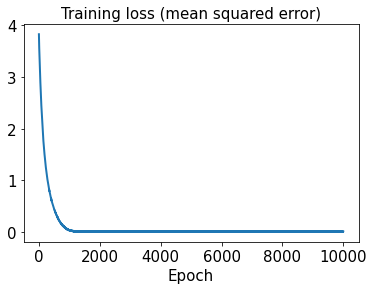

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

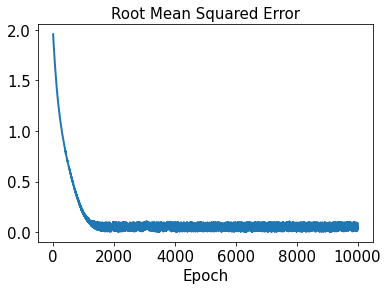

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 82ms/step - loss: 1.3542e-05 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.018500875282619286


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.01728719535029175


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.024845033607480405, 0.016842317348564246, 0.020521379595547277, 0.013180163869171074, 0.02160287303388848, 0.017036847592277294, 0.01842342113391447, 0.023816889841710532, 0.02029073449836203, 0.02479669094789116, 0.024567764268116667, 0.013310564880130861, 0.022522531810940067, 0.01699294935172539, 0.015164402121571849, 0.015184157432359444, 0.025106222992941345, 0.02068605246137037, 0.01652222279913617, 0.02472615862538042, 0.023335236483132606, 0.01729062013792834, 0.024395362120667393, 0.01607678498730018, 0.023738789744598723, 0.016439322607387376, 0.018754933072531788, 0.022329610684570657, 0.021903438735911093, 0.01632846354286441, 0.016030825714767178, 0.023973598298910225, 0.021590674519540116]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.014985680776850314, 0.01314328398591984, 0.01698928321371214, 0.017999300582573707, 0.017457666525892954, 0.015998963252317182, 0.02244055891353978, 0.019143909434738208]


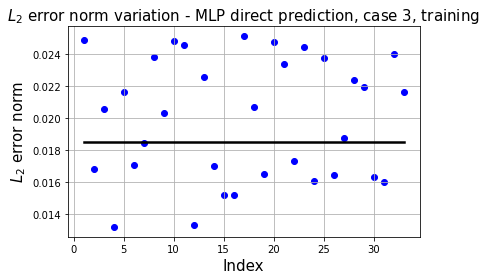

In [95]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

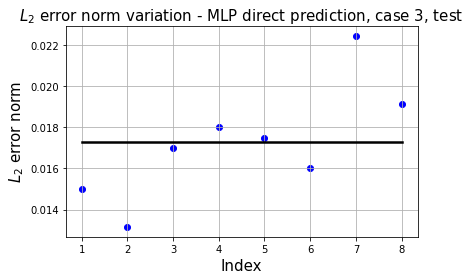

In [96]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

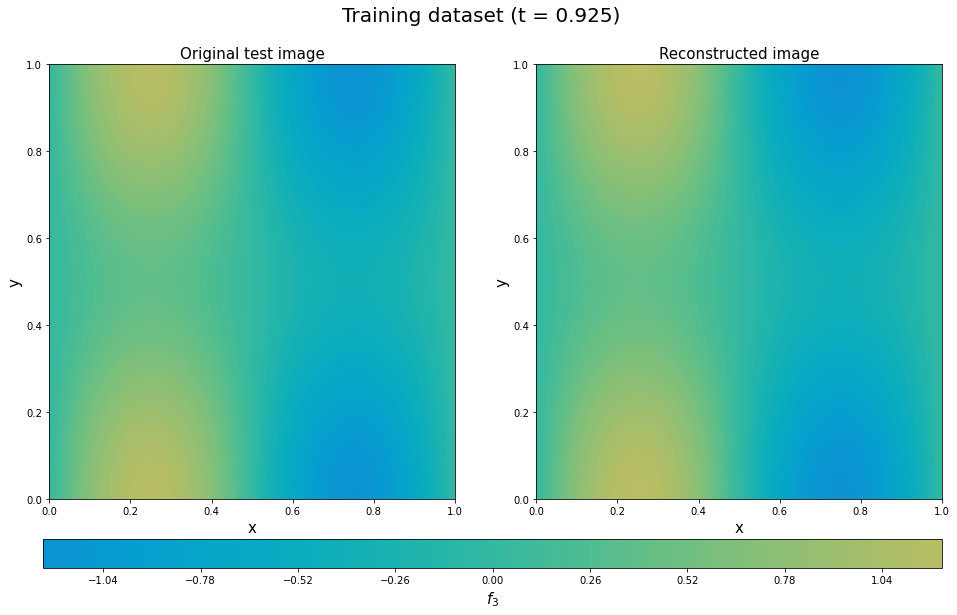

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

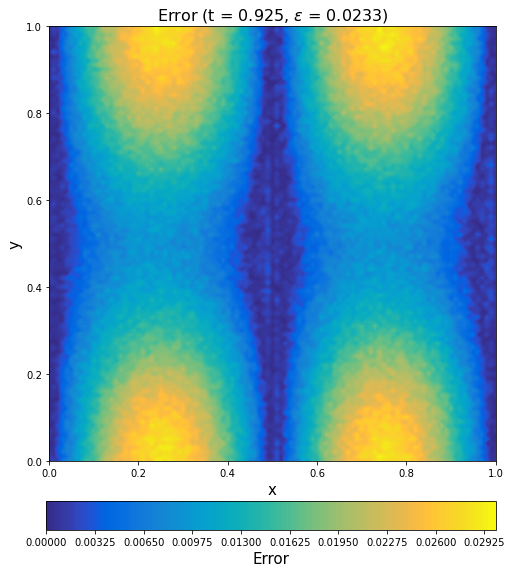

In [98]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

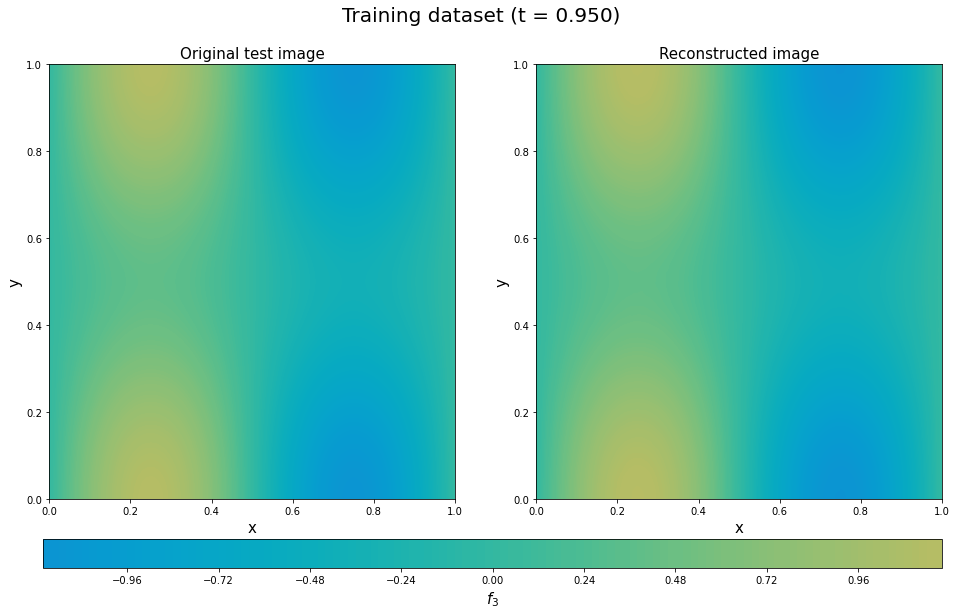

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

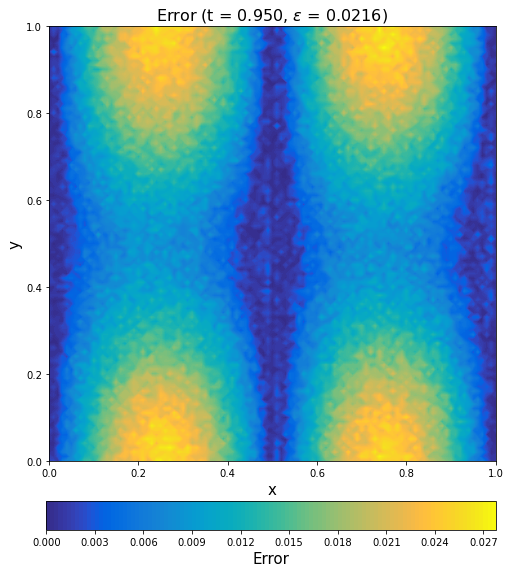

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

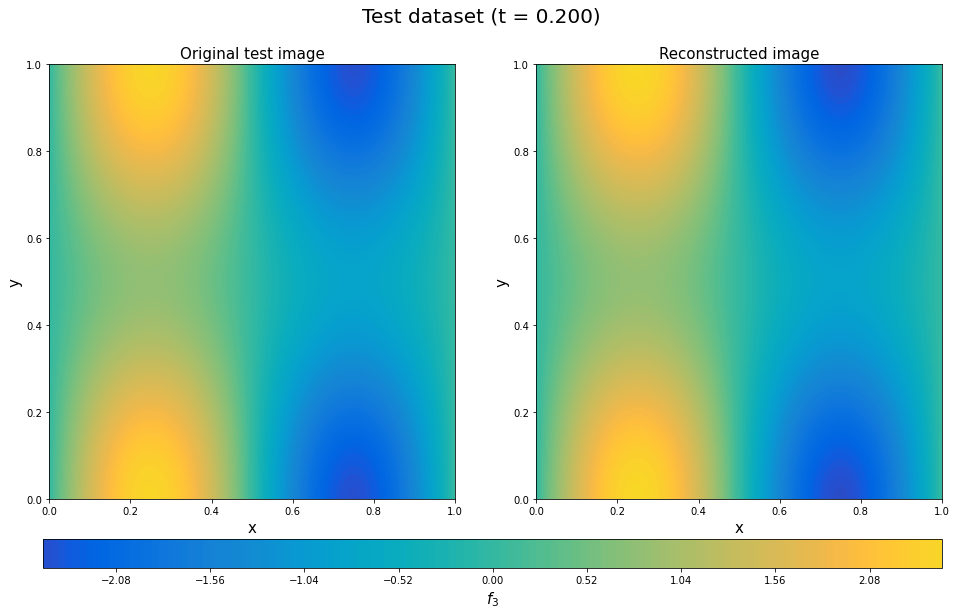

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

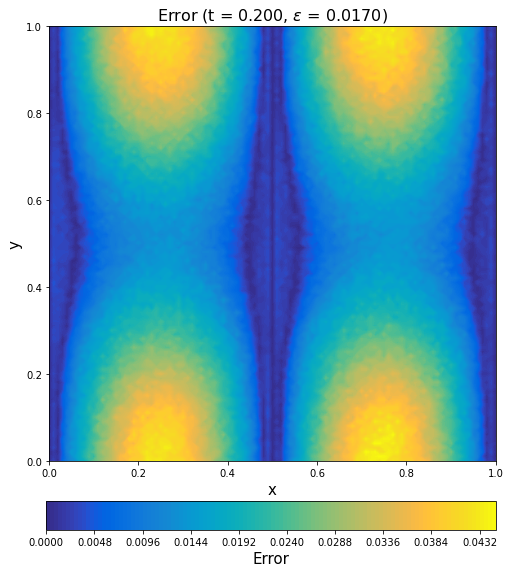

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

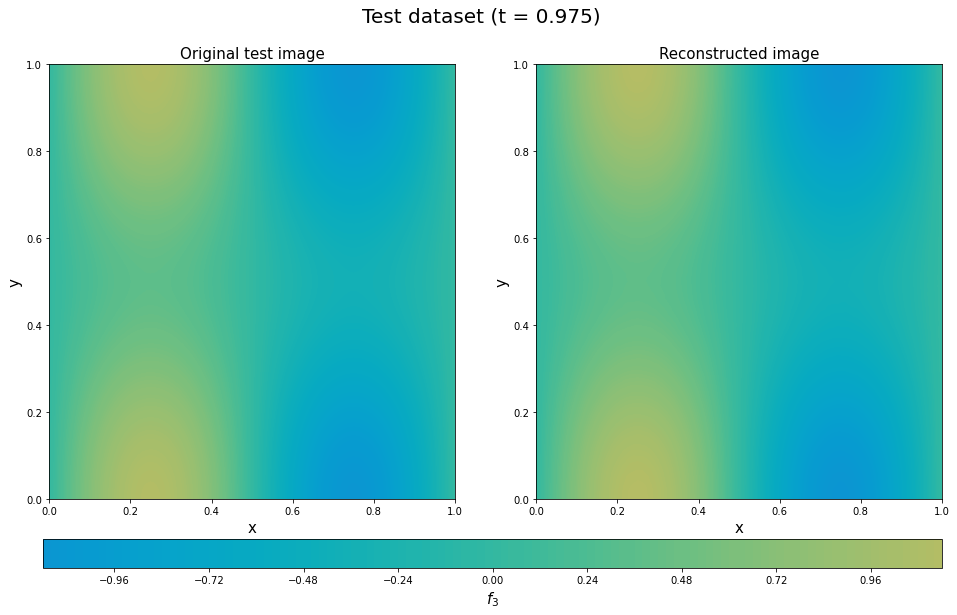

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

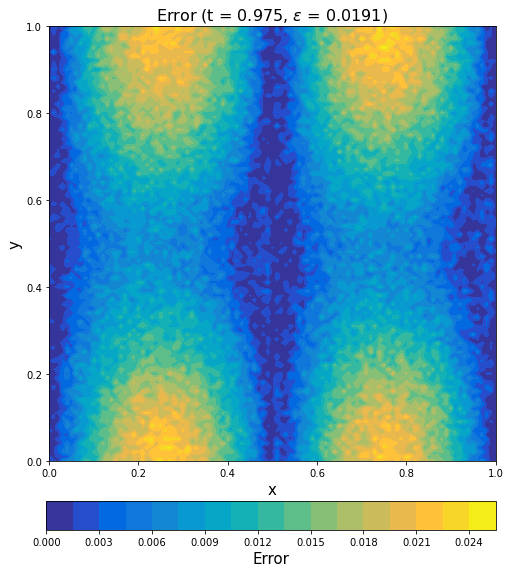

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()